## MANIPULATION DATA PYTHON

In [1]:
import sys
sys.path.append("/home/choberts/QUINEVOL/scripts/")
#sys.path.append("..")

import numpy as np
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy import stats
from matplotlib_venn import venn3, venn2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
from utils.fonctions import fonctions_utiles as fu
from datetime import date

import matplotlib.pyplot as plt
import matplotlib.colors as colors

sns.set_theme(style="whitegrid")
%matplotlib inline

today = date.today()
year = str(today.year)
month = str(today.month)
day = str(today.day)
date = '%s_%s_%s' % (year, month, day)

## Fichiers nécessaires

In [2]:
wd = "~/FNR/"

tuv_filtered_df_sorted = pd.read_csv(wd+'/results/pseudomonadota/genes_triplets_tab_UbiTUbiUUbiV_annot.tsv', sep='\t', index_col=0)
triplets_tab = pd.read_csv(wd+'/results/pseudomonadota/triplets_tab_UbiTUbiUUbiV.tsv', sep='\t')



df_pathways = pd.read_csv('/home/choberts/analyze_quinone_pathways_simple/results/article_one_final_dataset_bakta_enhanced/annotation_results_tax.tsv', sep="\t", index_col=0)
#infos sur la prédictions des gènes par génomes + les pathays + taxonomy

#sampled_dataset = pd.read_csv('/home/choberts/UQ/results/sampled_species_all_2021-2-17.csv')
#proteins_dataset = pd.read_csv('/home/choberts/UQ/results/archives/proteins_results_modifs-2021-2-17.csv')


#sampled_dataset = sampled_dataset[(sampled_dataset['genome'] != 'GCF_013467605.1_ASM1346760v1')
#		& (sampled_dataset['genome'] != 'GCF_013395035.1_ASM1339503v1')]

columns_names = ('genome','seq','index','gene','start_motif','end_motif','score',
                 'p-value','q-value','motif_id','matched_sequence')

#sampled_proteins_dataset = proteins_dataset[proteins_dataset.genome.isin(sampled_dataset.genome)]


#fimo_res = pd.read_csv(wd+'results/multifasta_MEME_450nt_25_06_21/MEME_results/
#fimo_results/january_2022/parsed_results/fimo_all_january.tsv',sep='\t')

fimo_res = pd.read_csv(wd+'results/pseudomonadota/MEME/FIMO/fimo_all.tsv', delim_whitespace=True)
fimo_res.columns = columns_names
#résultats de fimo

#display(len(sampled_dataset.genome))
#display(len(sampled_proteins_dataset.genome))


In [3]:
triplets_tab

,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,replicon1,replicon2,replicon3
0,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,contig_1,contig_1,contig_1
1,GCA_013693775.1_ASM1369377v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,8.0,469.0,1370.0,contig_1,contig_1,contig_1
2,GCA_013693915.1_ASM1369391v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,5.0,-3.0,922.0,contig_1,contig_1,contig_1
3,GCA_013693935.1_ASM1369393v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,2497.0,-13.0,3389.0,contig_1,contig_1,contig_1
4,GCA_015767675.1_ASM1576767v1,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2423.0,13.0,3485.0,contig_1,contig_1,contig_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,GCF_914590485.1_CEDIAZO_illumina_assembly,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,--+,10.0,119.0,1121.0,contig_1,contig_1,contig_1
1562,GCF_932126575.1_Thauera_sp_Piv1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,55.0,103.0,1069.0,contig_1,contig_1,contig_1
1563,GCF_937425535.1_Rhodovastum_atsumiense_G2-11,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,+++,-3.0,-3.0,1037.0,contig_1,contig_1,contig_1
1564,GCF_946902045.1_PRJEB55195,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,11.0,-13.0,915.0,contig_1,contig_1,contig_1


## FONCTIONS UTILES

In [44]:
def hist_distance_simple(df, ylimit = 0):
    sns.set_theme(rc={'figure.figsize':(15,9)}, style='whitegrid')
    toplot = 450-((df['start_motif']+df['end_motif'])/2)
    newBins = np.arange(0, 450, 5)
    sns.displot(toplot, bins=newBins, height=8, aspect=2)
    plt.xlim(0,450)
    if ylimit != 0 :
        plt.ylim(0,ylimit)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    xlabel =  df['gene'].values[0]
    if df['gene'].values[0] == 'UbiT':
        xlabel = "ubiT"
    if df['gene'].values[0] == 'UbiU':
        xlabel = "ubiU"
    plt.xlabel('distance from ' + xlabel, fontsize = 25)
    plt.ylabel('Number of FNR sites', fontsize = 25)
    #plt.title(gene+' orga: '+ df['topo_t'].value(), fontsize = 20)

def distance_genes(beg_g1, end_g1, beg_g2, end_g2):
    mini = min([beg_g1, end_g1, beg_g2, end_g2])
    maxi = max([beg_g1, end_g1, beg_g2, end_g2])
    return (maxi-mini)-(end_g1 - beg_g1)-(end_g2-beg_g2)

def add_distance_triplet(df, n_group):
    for g in df["genome"]:
        try:
            beg_T = df.loc[(df['genome']==g) & (df['gene_name']=='UbiT') & (df['n_triplet']== n_group), 'beginning'].values[0]
            end_T = df.loc[(df['genome']==g) & (df['gene_name']=='UbiT') & (df['n_triplet']== n_group), 'end'].values[0]
            beg_U = df.loc[(df['genome']==g) & (df['gene_name']=='UbiU') & (df['n_triplet']== n_group), 'beginning'].values[0]
            end_U = df.loc[(df['genome']==g) & (df['gene_name']=='UbiU') & (df['n_triplet']== n_group), 'end'].values[0]
            beg_V = df.loc[(df['genome']==g) & (df['gene_name']=='UbiV') & (df['n_triplet']== n_group), 'beginning'].values[0]
            end_V = df.loc[(df['genome']==g) & (df['gene_name']=='UbiV') & (df['n_triplet']== n_group), 'end'].values[0]
            distance_TU = distance_genes(beg_T, end_T, beg_U, end_U)
            distance_UV = distance_genes(beg_V, end_V, beg_U, end_U)
            distance_TV = distance_genes(beg_T, end_T, beg_V, end_V)
            df.loc[(df['genome']==g)  & (df['n_triplet']== n_group),'distance_TU'] = distance_TU
            df.loc[(df['genome']==g)  & (df['n_triplet']== n_group),'distance_TV'] = distance_TV
            df.loc[(df['genome']==g)  & (df['n_triplet']== n_group),'distance_UV'] = distance_UV
        except:
            pass
    return df

In [4]:
tuv_filtered_df_sorted[tuv_filtered_df_sorted['n_triplet']==2]

tuv_filtered_df_sorted = add_distance_triplet(tuv_filtered_df_sorted, 1)
tuv_filtered_df_sorted = add_distance_triplet(tuv_filtered_df_sorted, 2)

tuv_filtered_df_sorted.head()

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score,...,RQ_pw,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV
0,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092,1080105,+,UbiU,5.000000e-170,557.3,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0
1,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120,1081043,+,UbiV,1.400000e-125,411.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0
2,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04965,GCA_013347225.1_ASM1334722v1_974,1081040,1081492,+,UbiT,7.200000e-41,132.1,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0
3,GCA_013693775.1_ASM1369377v1,contig_1,KNMCFF_15555,GCA_013693775.1_ASM1369377v1_3057,3109152,3110153,+,UbiU,1.900000e-170,558.7,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1370.0,469.0,8.0
4,GCA_013693775.1_ASM1369377v1,contig_1,KNMCFF_15560,GCA_013693775.1_ASM1369377v1_3058,3110161,3111054,+,UbiV,2.000000e-125,410.5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1370.0,469.0,8.0


In [5]:
tuv_filtered_df_sorted[tuv_filtered_df_sorted['n_triplet']==2]


,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score,...,RQ_pw,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV
474,GCF_000632805.1_ASM63280v1,contig_1,HCKEGO_23505,GCF_000632805.1_ASM63280v1_4634,5193724,5194596,+,UbiT,6.100000e-41,132.3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2851.0,1959.0,14.0
475,GCF_000632805.1_ASM63280v1,contig_1,HCKEGO_23520,GCF_000632805.1_ASM63280v1_4637,5196555,5197433,-,UbiV,6.300000e-109,356.3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2851.0,1959.0,14.0
476,GCF_000632805.1_ASM63280v1,contig_1,HCKEGO_23525,GCF_000632805.1_ASM63280v1_4638,5197447,5198445,-,UbiU,1.200000e-159,523.1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2851.0,1959.0,14.0
1563,GCF_003952485.1_ASM395248v1,contig_1,DCDODJ_24400,GCF_003952485.1_ASM395248v1_4811,5141555,5142454,-,UbiV,2.400000e-102,334.7,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-3.0,999.0,4.0
1564,GCF_003952485.1_ASM395248v1,contig_1,DCDODJ_24405,GCF_003952485.1_ASM395248v1_4812,5142458,5143456,-,UbiU,1.400000e-150,493.4,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-3.0,999.0,4.0
1565,GCF_003952485.1_ASM395248v1,contig_1,DCDODJ_24410,GCF_003952485.1_ASM395248v1_4813,5143453,5143998,-,UbiT,4.100000e-30,97.2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-3.0,999.0,4.0
1722,GCF_004798725.1_ASM479872v1,contig_3,KGMIAI_33335,GCF_004798725.1_ASM479872v1_6569,271517,271960,-,UbiT,2.200000e-29,94.8,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,981.0,-3.0,43.0
1723,GCF_004798725.1_ASM479872v1,contig_3,KGMIAI_33340,GCF_004798725.1_ASM479872v1_6570,271957,272898,-,UbiV,1.100000e-117,385.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,981.0,-3.0,43.0
1724,GCF_004798725.1_ASM479872v1,contig_3,KGMIAI_33345,GCF_004798725.1_ASM479872v1_6571,272941,273987,-,UbiU,5.900000e-164,537.3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,981.0,-3.0,43.0
1791,GCF_005952805.1_ASM595280v1,contig_1,HDPHHJ_01120,GCF_005952805.1_ASM595280v1_224,213284,214318,+,UbiU,3.900000e-158,518.2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,981.0,-3.0,70.0


### Quels sont les cas avec espace entre T et UV / U et V 

In [6]:
##
orders_list = tuv_filtered_df_sorted[(tuv_filtered_df_sorted["distance_TU"] > 500) & (tuv_filtered_df_sorted["distance_TV"] > 500)]['family'].unique()
display(orders_list)

tuv_filtered_df_sorted['count']=1


tuv_temp = tuv_filtered_df_sorted[(tuv_filtered_df_sorted["distance_TU"] > 500) & (tuv_filtered_df_sorted["distance_TV"] > 500)]
tuv_temp_2 = tuv_filtered_df_sorted[(tuv_filtered_df_sorted["distance_TU"] > 500) & (tuv_filtered_df_sorted["distance_TV"] > 500)  & (tuv_filtered_df_sorted["distance_TU"] < 6000)  & (tuv_filtered_df_sorted["distance_TV"] < 6000)]
display(tuv_temp)
display(tuv_temp_2)

display(tuv_filtered_df_sorted[tuv_filtered_df_sorted['family'].isin(orders_list)][["family", "count"]].groupby('family').sum()/3)
display(tuv_temp[["family", "count"]].groupby('family').sum()/3)
display(tuv_temp_2[["family", "count"]].groupby('family').sum()/3)


array(['Xanthomonadaceae', 'Vibrionaceae',
       'Candidatus Competibacteraceae', 'Chromatiaceae', 'unknown',
       'Magnetococcaceae', 'Oxalobacteraceae', 'Halomonadaceae',
       'Alcaligenaceae', 'Rhodospirillaceae', 'Marinobacteraceae',
       'Sulfuricellaceae', 'Alcanivoracaceae', 'Comamonadaceae',
       'Orbaceae', 'Rhodanobacteraceae', 'Ectothiorhodospiraceae',
       'Acidiferrobacteraceae', 'Morganellaceae', 'Zoogloeaceae',
       'Oceanospirillaceae', 'Aurantimonadaceae', 'Wenzhouxiangellaceae',
       'Enterobacteriaceae', 'Alteromonadaceae', 'Endozoicomonadaceae',
       'Sedimenticolaceae', 'Budviciaceae'], dtype=object)

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score,...,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV,count
9,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14325,GCA_013693935.1_ASM1369393v1_2812,3066593,3067432,+,UbiT,4.000000e-37,119.9,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
10,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14335,GCA_013693935.1_ASM1369393v1_2814,3069929,3070834,-,UbiV,8.600000e-111,362.4,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
11,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14340,GCA_013693935.1_ASM1369393v1_2815,3070821,3071816,-,UbiU,7.400000e-161,527.2,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
12,GCA_015767675.1_ASM1576767v1,contig_1,FNMFAL_13060,GCA_015767675.1_ASM1576767v1_2523,2804274,2804807,-,UbiT,2.200000e-60,195.3,...,1.0,1.0,1.0,0.0,0.0,0.0,2423.0,3485.0,13.0,1
13,GCA_015767675.1_ASM1576767v1,contig_1,FNMFAL_13070,GCA_015767675.1_ASM1576767v1_2525,2807230,2808279,+,UbiU,1.600000e-175,575.4,...,1.0,1.0,1.0,0.0,0.0,0.0,2423.0,3485.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,GCF_907164845.1_Lysobacter_CECT30171,contig_1,APFMGB_02365,GCF_907164845.1_Lysobacter_CECT30171_468,505427,506317,-,UbiV,4.100000e-107,350.4,...,1.0,1.0,0.0,0.0,0.0,0.0,6370.0,5469.0,11.0,1
4682,GCF_907164845.1_Lysobacter_CECT30171,contig_1,APFMGB_02370,GCF_907164845.1_Lysobacter_CECT30171_469,506328,507326,-,UbiU,4.900000e-161,527.7,...,1.0,1.0,0.0,0.0,0.0,0.0,6370.0,5469.0,11.0,1
4695,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12575,GCF_949787665.1_MIP2473_genome_2350,2665679,2666200,-,UbiT,2.600000e-59,191.8,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1
4696,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607,2669614,+,UbiU,2.800000e-173,568.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1


,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score,...,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV,count
9,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14325,GCA_013693935.1_ASM1369393v1_2812,3066593,3067432,+,UbiT,4.000000e-37,119.9,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
10,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14335,GCA_013693935.1_ASM1369393v1_2814,3069929,3070834,-,UbiV,8.600000e-111,362.4,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
11,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14340,GCA_013693935.1_ASM1369393v1_2815,3070821,3071816,-,UbiU,7.400000e-161,527.2,...,1.0,1.0,0.0,0.0,0.0,0.0,3389.0,2497.0,-13.0,1
12,GCA_015767675.1_ASM1576767v1,contig_1,FNMFAL_13060,GCA_015767675.1_ASM1576767v1_2523,2804274,2804807,-,UbiT,2.200000e-60,195.3,...,1.0,1.0,1.0,0.0,0.0,0.0,2423.0,3485.0,13.0,1
13,GCA_015767675.1_ASM1576767v1,contig_1,FNMFAL_13070,GCA_015767675.1_ASM1576767v1_2525,2807230,2808279,+,UbiU,1.600000e-175,575.4,...,1.0,1.0,1.0,0.0,0.0,0.0,2423.0,3485.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,GCF_905175365.1_B1REV17-Hybrid_2,contig_1,PNGILK_11540,GCF_905175365.1_B1REV17-Hybrid_2_2236,2469824,2470837,+,UbiU,3.500000e-175,574.2,...,1.0,1.0,1.0,0.0,0.0,0.0,2570.0,3592.0,9.0,1
4673,GCF_905175365.1_B1REV17-Hybrid_2,contig_1,PNGILK_11545,GCF_905175365.1_B1REV17-Hybrid_2_2237,2470846,2471736,+,UbiV,1.500000e-123,404.3,...,1.0,1.0,1.0,0.0,0.0,0.0,2570.0,3592.0,9.0,1
4695,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12575,GCF_949787665.1_MIP2473_genome_2350,2665679,2666200,-,UbiT,2.600000e-59,191.8,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1
4696,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607,2669614,+,UbiU,2.800000e-173,568.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1


,count
family,
Acidiferrobacteraceae,4.0
Alcaligenaceae,25.0
Alcanivoracaceae,3.0
Alteromonadaceae,10.0
Aurantimonadaceae,5.0
Budviciaceae,4.0
Candidatus Competibacteraceae,1.0
Chromatiaceae,13.0
Comamonadaceae,38.0


,count
family,
Acidiferrobacteraceae,3.0
Alcaligenaceae,2.0
Alcanivoracaceae,2.0
Alteromonadaceae,3.0
Aurantimonadaceae,2.0
Budviciaceae,2.0
Candidatus Competibacteraceae,1.0
Chromatiaceae,9.0
Comamonadaceae,11.0


,count
family,
Acidiferrobacteraceae,2.0
Alcaligenaceae,2.0
Alcanivoracaceae,2.0
Alteromonadaceae,3.0
Budviciaceae,2.0
Candidatus Competibacteraceae,1.0
Chromatiaceae,1.0
Comamonadaceae,10.0
Ectothiorhodospiraceae,1.0


In [7]:
fimo_res=fimo_res[fimo_res['q-value']<=0.05]
#fimo_res=fimo_res[fimo_res['p-value']<=1e-05]

fimo_res['n_triplet']=fimo_res['index']
fimo_res[fimo_res['genome']=="GCF_013459415.1_ASM1345941v1"]

ind = fimo_res.groupby(['genome', 'n_triplet','gene', 'start_motif'])['p-value'].idxmin()
fimo_res_bestpval = fimo_res.loc[ind].sort_index()

In [7]:
fimo_res_bestpval

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
427,GCF_900475855.1_46338_B02,contig_1,1,UbiT,34,47,16.95080,0.000001,0.00211,YTGMYTTAARKCAR,TTGATTTAGAGCAG,1
428,GCF_019343475.1_ASM1934347v1,contig_1,1,UbiT,137,150,16.95080,0.000001,0.00211,YTGMYTTAARKCAR,TTGATTTAGAGCAG,1
484,GCF_002407485.1_ASM240748v1,contig_1,1,UbiT,55,68,16.14750,0.000003,0.00390,YTGMYTTAARKCAR,TTGATTTGAAACAA,1
485,GCF_000013765.1_ASM1376v1,contig_1,1,UbiT,372,385,16.11480,0.000003,0.00401,YTGMYTTAARKCAR,TTGATTTGAAACAG,1
486,GCF_030252245.1_ASM3025224v1,contig_1,1,UbiT,373,386,16.11480,0.000003,0.00401,YTGMYTTAARKCAR,TTGATTTGAAACAG,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11203,GCF_003072645.1_ASM307264v1,contig_1,1,UbiU,377,390,10.14750,0.000052,0.04040,YTGMYTTAARKCAR,ATGCCTCAGGTCAA,1
11206,GCF_000018025.1_ASM1802v1,contig_1,1,UbiU,372,385,9.98361,0.000055,0.04230,YTGMYTTAARKCAR,ATGTTTTATATCAA,1
11212,GCF_000019185.1_ASM1918v1,contig_1,1,UbiU,381,394,9.73770,0.000060,0.04570,YTGMYTTAARKCAR,ATGTTTTACATCAA,1
11238,GCF_000463345.2_ASM46334v3,contig_1,1,UbiU,46,59,9.62295,0.000063,0.04630,YTGMYTTAARKCAR,ATGCTGCAAGGCAA,1


In [6]:
fimo_res_bestpval[fimo_res_bestpval['genome']=='GCF_000021865.1_ASM2186v1']

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
1978,GCF_000021865.1_ASM2186v1,contig_1,1,UbiT,365,378,15.6711,0.000003,0.022,TTGABCYRGVTCAA,TTGATATTGATCAA,1


# FNR en amont de T, U ou V ? 

In [9]:
fimo_res_bestpval[fimo_res_bestpval['index']==2]

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
6301,GCF_004798725.1_ASM479872v1,contig_3,2,UbiU,366,379,14.4211,0.000009,0.0354,TTGABCYRGVTCAA,TTGCGCACGATCAA,2
6641,GCF_004798725.1_ASM479872v1,contig_3,2,UbiU,275,288,16.1690,0.000002,0.0114,TTGAYCYRGRTCAA,TTGCCGCAGGTCAA,2
11104,GCF_000632805.1_ASM63280v1,contig_1,2,UbiU,378,391,12.7705,0.000019,0.0169,YTGMYTTAARKCAR,CTGACGCATGTCAG,2


In [42]:
display(fimo_res[fimo_res['gene']=='UbiT'])
len(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiT'].unique())

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
0,GCA_016618195.1_ASM1661819v1,contig_1,1,UbiT,33,46,18.78690,2.110000e-07,0.00067,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
1,GCF_027362595.1_ASM2736259v1,contig_1,1,UbiT,96,109,18.78690,2.110000e-07,0.00067,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
2,GCF_029542345.1_ASM2954234v1,contig_1,1,UbiT,96,109,18.78690,2.110000e-07,0.00067,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
3,GCF_029277985.1_ASM2927798v1,contig_1,1,UbiT,96,109,18.78690,2.110000e-07,0.00067,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
4,GCF_003048255.1_ASM304825v1,contig_1,1,UbiT,176,189,18.78690,2.110000e-07,0.00067,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10287,GCF_000344805.1_ASM34480v1,contig_1,1,UbiT,402,415,9.70492,6.060000e-05,0.04630,YTGMYTTAARKCAR,TTGTTCCGGGTCAA,1
10288,GCF_000019185.1_ASM1918v1,contig_1,1,UbiT,375,388,9.65574,6.170000e-05,0.04700,YTGMYTTAARKCAR,TTGATGTAAAACAT,1
10289,GCF_001043175.1_ASM104317v1,contig_1,1,UbiT,355,368,9.52459,6.480000e-05,0.04920,YTGMYTTAARKCAR,CTGAGCTATATCAA,1
10290,GCF_000283275.1_ASM28327v1,contig_1,1,UbiT,355,368,9.52459,6.480000e-05,0.04920,YTGMYTTAARKCAR,CTGAGCTATATCAA,1


1001

In [43]:
fimo_res_bestpval['p-value'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 427      0.000001
428      0.000001
484      0.000003
485      0.000003
486      0.000003
           ...   
11203    0.000052
11206    0.000055
11212    0.000060
11238    0.000063
11239    0.000063
Name: p-value, Length: 2416, dtype: float64>

In [44]:
fimo_res[fimo_res['gene']=='UbiU']
fimo_res_bestpval[fimo_res_bestpval['gene']=='UbiU']
len(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiT'].unique())

1001

In [12]:
len(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiU'].unique())

1178

In [13]:
len(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiV'].unique())

0

In [45]:
fimo_res[fimo_res['gene']=='UbiV']
fimo_res_bestpval[fimo_res_bestpval['gene']=='UbiV']

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet


In [46]:
# combien de FNR bs devant au moins un des gènes
fimo_T = list(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiT'].unique())
fimo_U = list(fimo_res_bestpval.genome[fimo_res_bestpval['gene']=='UbiU'].unique())

fimo_U.extend(x for x in fimo_T if x not in fimo_U)

len(fimo_U)

1360

In [30]:
# cas avec deux triplets 
fimo_res_bestpval[fimo_res_bestpval['index']==2]

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
6301,GCF_004798725.1_ASM479872v1,contig_3,2,UbiU,366,379,14.4211,0.000009,0.0354,TTGABCYRGVTCAA,TTGCGCACGATCAA,2
6641,GCF_004798725.1_ASM479872v1,contig_3,2,UbiU,275,288,16.1690,0.000002,0.0114,TTGAYCYRGRTCAA,TTGCCGCAGGTCAA,2
11104,GCF_000632805.1_ASM63280v1,contig_1,2,UbiU,378,391,12.7705,0.000019,0.0169,YTGMYTTAARKCAR,CTGACGCATGTCAG,2


In [106]:
fimo_res_bestpval[fimo_res_bestpval['genome']=='GCF_000005845.2_ASM584v2']

,genome,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence,n_triplet
3266,GCF_000005845.2_ASM584v2,contig_1,1,UbiT,323,336,18.9180,1.980000e-07,0.000629,YTGMYTTAARKCAR,TTGATTTAAGGCAG,1
4071,GCF_000005845.2_ASM584v2,contig_1,1,UbiU,357,370,18.8689,1.850000e-07,0.000565,YTGMYTTAARKCAR,CTGCCTTAAATCAA,1


# FNR par orga

In [8]:
# avoir toutes les orgas possibles et leur effectif 
triplets_tab['config']=0

TUV = (triplets_tab['triplet'] =='UbiT UbiU UbiV')
UVT = (triplets_tab['triplet'] =='UbiU UbiV UbiT')
TVU = (triplets_tab['triplet'] =='UbiT UbiV UbiU')
VUT = (triplets_tab['triplet'] =='UbiV UbiU UbiT')

PP1 = (triplets_tab['strand'] =='+++')
PP2 = (triplets_tab['strand'] =='---')
DP1 = (triplets_tab['strand'] =='-++')
DP2 = (triplets_tab['strand'] =='--+')
CP1 = (triplets_tab['strand'] =='+--')
CP2 = (triplets_tab['strand'] =='++-')

triplets_tab.loc[(TUV & PP1) | (VUT & PP2), 'config'] = 1
triplets_tab.loc[(UVT & PP1) | (TVU & PP2), 'config'] = 2
triplets_tab.loc[(TUV & DP1) | (VUT & DP2), 'config'] = 3
triplets_tab.loc[(TVU & CP1) | (UVT & CP2), 'config'] = 4

display(triplets_tab[triplets_tab['config'] == 0]) # empty dataframe as expected
# on a bien toutes les possibilité couvertes par les 4 orgas

# ajout de l'information sur la distance entre les gènes dans config.
dmax = 500
for i in range(1,5):
    sticked = ((triplets_tab['distance_gene1_gene2'] <= dmax) & (triplets_tab['distance_gene2_gene3'] <= dmax))
    unsticked = ((triplets_tab['distance_gene1_gene2'] > dmax) & (triplets_tab['distance_gene2_gene3'] > dmax))
    half_sticked_left = ((triplets_tab['distance_gene1_gene2'] <= dmax) & (triplets_tab['distance_gene2_gene3'] > dmax))
    half_sticked_right = ((triplets_tab['distance_gene1_gene2'] > dmax) & (triplets_tab['distance_gene2_gene3'] <= dmax))
    
    triplets_tab.loc[(triplets_tab['config'] == i) & sticked, 'config_detailed'] = str(i)+'_sticked'
    triplets_tab.loc[(triplets_tab['config'] == i) & unsticked, 'config_detailed'] = str(i)+'_unsticked'
    #if (i != 2): 
    triplets_tab.loc[(triplets_tab['gene1'] == "UbiT") & (triplets_tab['config'] == i) & half_sticked_left, 'config_detailed'] = str(i)+'_TU_sticked'
    triplets_tab.loc[(triplets_tab['gene1'] == "UbiT") & (triplets_tab['config'] == i) & half_sticked_right, 'config_detailed'] = str(i)+'_UV_sticked'
    triplets_tab.loc[(triplets_tab['gene1'] != "UbiT") & (triplets_tab['config'] == i) & half_sticked_left, 'config_detailed'] = str(i)+'_UV_sticked'
    triplets_tab.loc[(triplets_tab['gene1'] != "UbiT") & (triplets_tab['config'] == i) & half_sticked_right, 'config_detailed'] = str(i)+'_TU_sticked'
    #else : 
    #    triplets_tab.loc[(triplets_tab['gene3'] == "UbiT") & (triplets_tab['config'] == i) & half_sticked_left, 'config_detailed'] = str(i)+'_UV_sticked'
    #    triplets_tab.loc[(triplets_tab['gene3'] == "UbiT") & (triplets_tab['config'] == i) & half_sticked_right, 'config_detailed'] = str(i)+'_UV_sticked'
    #    triplets_tab.loc[(triplets_tab['gene3'] != "UbiT") & half_sticked_left, 'config_detailed'] = str(i)+'_UV_sticked'
    #    triplets_tab.loc[(triplets_tab['gene3'] != "UbiT") & half_sticked_right, 'config_detailed'] = str(i)+'_TU_sticked'

triplets_tab['count']=1
triplets_tab[['config_detailed','count']].groupby('config_detailed').sum().sort_values('count', ascending=False)

,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,replicon1,replicon2,replicon3,config


,count
config_detailed,
3_sticked,686
2_sticked,367
1_sticked,229
3_UV_sticked,147
4_UV_sticked,78
4_sticked,24
2_UV_sticked,17
1_UV_sticked,11
2_TU_sticked,5


In [9]:
merged_tab = triplets_tab.merge(tuv_filtered_df_sorted, on=('genome', 'n_triplet'), how='left')
merged_tab

,genome,n_triplet,gene1,gene2,gene3,triplet,strand_x,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,...,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV,count_y
0,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,...,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0,1
1,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,...,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0,1
2,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,...,1.0,1.0,1.0,0.0,1.0,0.0,935.0,-3.0,15.0,1
3,GCA_013693775.1_ASM1369377v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,8.0,469.0,1370.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1370.0,469.0,8.0,1
4,GCA_013693775.1_ASM1369377v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,8.0,469.0,1370.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1370.0,469.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,GCF_946902045.1_PRJEB55195,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,11.0,-13.0,915.0,...,1.0,1.0,0.0,0.0,0.0,0.0,915.0,-13.0,11.0,1
4694,GCF_946902045.1_PRJEB55195,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,11.0,-13.0,915.0,...,1.0,1.0,0.0,0.0,0.0,0.0,915.0,-13.0,11.0,1
4695,GCF_949787665.1_MIP2473_genome,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2407.0,11.0,3425.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1
4696,GCF_949787665.1_MIP2473_genome,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2407.0,11.0,3425.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2407.0,3425.0,11.0,1


gamma total: 1090
2_sticked


145

0.13302752293577982

4_UV_sticked


75

0.06880733944954129

3_UV_sticked


146

0.13394495412844037

3_sticked


685

0.6284403669724771

1_UV_sticked


9

0.008256880733944955

2_UV_sticked


2

0.001834862385321101

4_sticked


23

0.02110091743119266

1_sticked


5

0.0045871559633027525

2_unsticked


0

0.0

2_TU_sticked


0

0.0

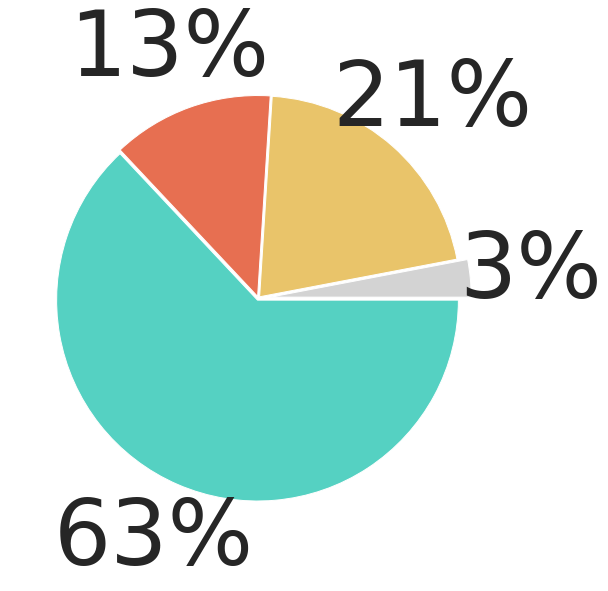

In [49]:
# camembert plots des différentes architectures 
color_code = {1: '#9895c5ff', 2: '#55d1c2ff', 3: '#e9c46a', 4: '#f4a261', 5: '#e76f51'}
print('gamma total:',len(merged_tab.genome[(merged_tab['class']=='Gammaproteobacteria')].unique()))

config_detailed_list = merged_tab.config_detailed.unique()
for conf in config_detailed_list: 
    print(conf)
    display(len(merged_tab.genome[(merged_tab['class']=='Gammaproteobacteria') & (merged_tab['config_detailed']==conf)].unique()))
    display(len(merged_tab.genome[(merged_tab['class']=='Gammaproteobacteria') & (merged_tab['config_detailed']==conf)].unique())/len(merged_tab.genome[(merged_tab['class']=='Gammaproteobacteria')].unique()))
    
plt.figure(figsize=(9,11))
explode = (0.06, 0.01, 0.01, 0.01)
plt.pie(np.array([0.03,0.21,0.13, 0.63]),explode=explode, autopct='%1.0f%%', colors=('lightgrey', color_code[3], color_code[5],  color_code[2]),
        pctdistance=1.3, labeldistance=1.2, textprops={'fontsize': 90})
pp = PdfPages('/home/choberts/article_one/img/gamma_tuv_piechart.pdf')
plt.savefig(pp, format='pdf', 
            bbox_inches='tight', 
            pad_inches=1)
pp.close()

plt.show()

In [99]:
ord_list_1 = merged_tab[(merged_tab['class']=='Gammaproteobacteria') & (merged_tab["config_detailed"]=='3_UV_sticked')]
ord_list_2 = merged_tab[(merged_tab['class']=='Gammaproteobacteria') & (merged_tab["config_detailed"]=='4_UV_sticked')]
merged_tab['count']=1
display(ord_list_1[["order", "count"]].groupby('order').sum())
display(ord_list_2[["order", "count"]].groupby('order').sum())
ord_list_1

ord_list_1.drop_duplicates(subset='genome', inplace=True)
ord_list_1[ord_list_1['order']=='Vibrionales'][['genome','beginning']].head(50)


,count
order,
Alteromonadales,9
Chromatiales,6
Enterobacterales,24
Oceanospirillales,3
Orbales,6
Pseudomonadales,3
Vibrionales,378
Xanthomonadales,6
unknown,3


,count
order,
Acidiferrobacterales,9
Chromatiales,21
Oceanospirillales,96
Orbales,6
Pseudomonadales,36
Xanthomonadales,51
unknown,9


,genome,beginning
12,GCA_015767675.1_ASM1576767v1,2804274
39,GCA_019703815.1_ASM1970381v1,2609423
84,GCF_000011805.1_ASM1180v1,529456
207,GCF_000024825.1_ASM2482v1,1127246
240,GCF_000091465.1_ASM9146v1,2641032
273,GCF_000196095.1_ASM19609v1,2565083
276,GCF_000196255.1_ASM19625v1,675838
279,GCF_000196495.1_ASM19649v1,668165
345,GCF_000241385.1_ASM24138v1,2808684
507,GCF_000770115.1_ASM77011v2,3106024


alpha total: 224
2_sticked


1

0.004464285714285714

4_UV_sticked


1

0.004464285714285714

3_UV_sticked


0

0.0

3_sticked


1

0.004464285714285714

1_UV_sticked


2

0.008928571428571428

2_UV_sticked


1

0.004464285714285714

4_sticked


0

0.0

1_sticked


218

0.9732142857142857

2_unsticked


0

0.0

2_TU_sticked


0

0.0

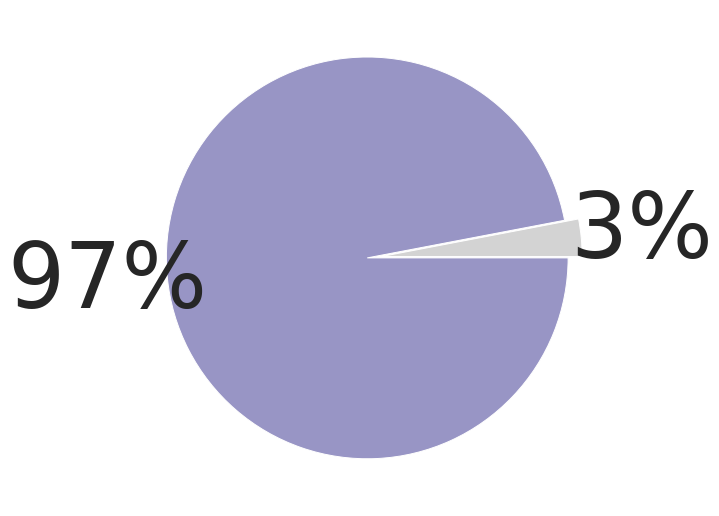

In [41]:
config_detailed_list = merged_tab.config_detailed.unique()
print('alpha total:',len(merged_tab.genome[(merged_tab['class']=='Alphaproteobacteria')].unique()))

for conf in config_detailed_list: 
    print(conf)
    display(len(merged_tab.genome[(merged_tab['class']=='Alphaproteobacteria') & (merged_tab['config_detailed']==conf)].unique()))
    display(len(merged_tab.genome[(merged_tab['class']=='Alphaproteobacteria') & (merged_tab['config_detailed']==conf)].unique()) / len(merged_tab.genome[(merged_tab['class']=='Alphaproteobacteria')].unique()))
    
plt.figure(figsize=(9,11))
explode = (0.06, 0.01)
plt.pie(np.array([0.03, 0.97]),explode=explode, autopct='%1.0f%%', colors=('lightgrey', color_code[1] ), pctdistance=1.3, labeldistance=1.4, textprops={'fontsize': 90})
pp = PdfPages('/home/choberts/article_one/img/alpha_tuv_piechart.pdf')
plt.savefig(pp, format='pdf', 
            bbox_inches='tight', 
            pad_inches=1)
pp.close()

plt.show()

beta total: 243
2_sticked


0.897119341563786

218

4_UV_sticked


0.00411522633744856

1

3_UV_sticked


0.00411522633744856

1

3_sticked


0.0

0

1_UV_sticked


0.0

0

2_UV_sticked


0.05761316872427984

14

4_sticked


0.00411522633744856

1

1_sticked


0.00411522633744856

1

2_unsticked


0.00823045267489712

2

2_TU_sticked


0.0205761316872428

5

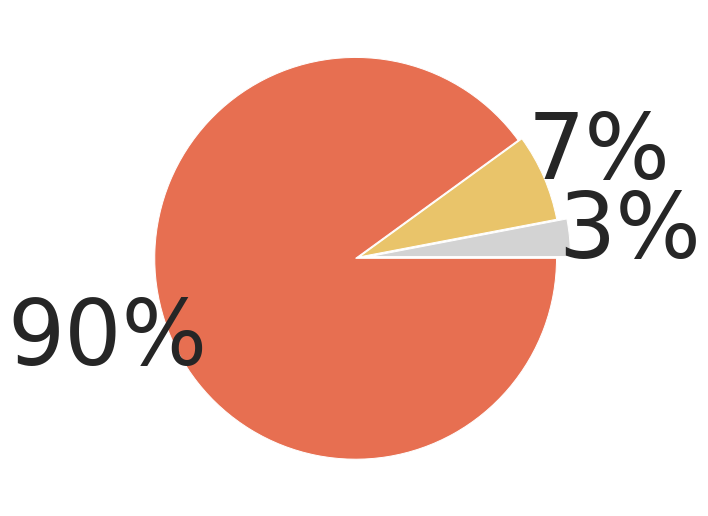

,genome,n_triplet,gene1,gene2,gene3,triplet,strand_x,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,...,RQ_pw,UQ-O2dep_found,UQ-O2indep_found,MK-classical_found,MK-futalosine_found,RQ_found,PQ_found,distance_TU,distance_TV,distance_UV
30,GCA_017347485.1_ASM1734748v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,74.0,719.0,1686.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1686.0,719.0,74.0
31,GCA_017347485.1_ASM1734748v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,74.0,719.0,1686.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1686.0,719.0,74.0
32,GCA_017347485.1_ASM1734748v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,74.0,719.0,1686.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1686.0,719.0,74.0
222,GCF_000026125.1_ASM2612v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,640.0,49.0,1600.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1600.0,640.0,49.0
223,GCF_000026125.1_ASM2612v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,640.0,49.0,1600.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1600.0,640.0,49.0
224,GCF_000026125.1_ASM2612v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,640.0,49.0,1600.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1600.0,640.0,49.0
297,GCF_000209655.1_ASM20965v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,84.0,662.0,1633.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1633.0,662.0,84.0
298,GCF_000209655.1_ASM20965v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,84.0,662.0,1633.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1633.0,662.0,84.0
299,GCF_000209655.1_ASM20965v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,84.0,662.0,1633.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1633.0,662.0,84.0
381,GCF_000297055.2_ASM29705v2,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,53534.0,55.0,54509.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,54509.0,53534.0,55.0


In [42]:
config_detailed_list = merged_tab.config_detailed.unique()
print('beta total:',len(merged_tab.genome[(merged_tab['class']=='Betaproteobacteria')].unique()))

for conf in config_detailed_list: 
    print(conf)
    display(len(merged_tab.genome[(merged_tab['class']=='Betaproteobacteria') & (merged_tab['config_detailed']==conf)].unique()) / len(merged_tab.genome[(merged_tab['class']=='Betaproteobacteria')].unique()))
    display(len(merged_tab.genome[(merged_tab['class']=='Betaproteobacteria') & (merged_tab['config_detailed']==conf)].unique()))

plt.figure(figsize=(9,11))
explode = (0.06, 0.01, 0.01)
plt.pie(np.array([0.03, 0.07, 0.90]),explode=explode, autopct='%1.0f%%', colors=('lightgrey', color_code[3], color_code[5]), pctdistance=1.3, labeldistance=1.4, textprops={'fontsize': 90})
pp = PdfPages('/home/choberts/article_one/img/beta_tuv_piechart.pdf')
plt.savefig(pp, format='pdf', 
            bbox_inches='tight', 
            pad_inches=1)
pp.close()

plt.show()

display(merged_tab[(merged_tab['class']=='Betaproteobacteria')  & (merged_tab['config_detailed']=='2_UV_sticked')])

In [10]:
ord_list_1 = merged_tab[(merged_tab['class']=='Betaproteobacteria') & (merged_tab["config_detailed"]=='2_UV_sticked')]
ord_list_2 = merged_tab[(merged_tab['class']=='Betaproteobacteria') & (merged_tab["config_detailed"]=='3_UV_sticked')]
ord_list_3 = merged_tab[(merged_tab['class']=='Betaproteobacteria') & (merged_tab["config_detailed"]=='4_UV_sticked')]

merged_tab['count']=1
display(ord_list_1[["family", "count"]].groupby('family').sum())
display(ord_list_2[["family", "count"]].groupby('family').sum())
display(ord_list_3[["family", "count"]].groupby('family').sum())

ord_list_1

ord_list_1.drop_duplicates(subset='genome', inplace=True)
ord_list_1[ord_list_1['order']=='Burkholderiales'][['genome','beginning']].head(50)

KeyError: "['count'] not in index"

beta total: 1
2_sticked


1.0

1

4_UV_sticked


0.0

0

3_UV_sticked


0.0

0

3_sticked


0.0

0

1_UV_sticked


0.0

0

2_UV_sticked


0.0

0

4_sticked


0.0

0

1_sticked


0.0

0

2_unsticked


0.0

0

2_TU_sticked


0.0

0

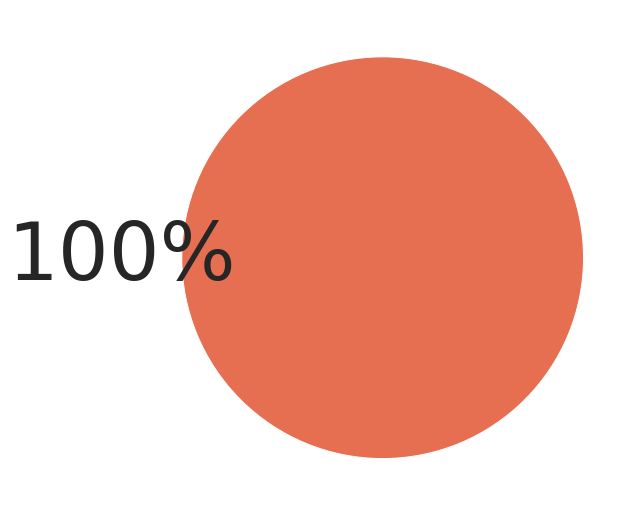

In [43]:
config_detailed_list = merged_tab.config_detailed.unique()
print('beta total:',len(merged_tab.genome[(merged_tab['class']=='Hydrogenophilia')].unique()))

for conf in config_detailed_list: 
    print(conf)
    display(len(merged_tab.genome[(merged_tab['class']=='Hydrogenophilia') & (merged_tab['config_detailed']==conf)].unique()) / len(merged_tab.genome[(merged_tab['class']=='Hydrogenophilia')].unique()))
    display(len(merged_tab.genome[(merged_tab['class']=='Hydrogenophilia') & (merged_tab['config_detailed']==conf)].unique()))

plt.figure(figsize=(9,11))
explode = (0.05, 0.01)
plt.pie(np.array([1]), autopct='%1.0f%%', colors=(color_code[5], 'orange'), pctdistance=1.3, labeldistance=1.4, textprops={'fontsize': 80})

pp = PdfPages('/home/choberts/article_one/img/hydrogeno_tuv_piechart.pdf')
plt.savefig(pp, format='pdf', 
            bbox_inches='tight', 
            pad_inches=1)
pp.close()

plt.show()


beta total: 4
2_sticked


0.0

0

4_UV_sticked


0.0

0

3_UV_sticked


0.0

0

3_sticked


0.0

0

1_UV_sticked


0.0

0

2_UV_sticked


0.0

0

4_sticked


0.0

0

1_sticked


1.0

4

2_unsticked


0.0

0

2_TU_sticked


0.0

0

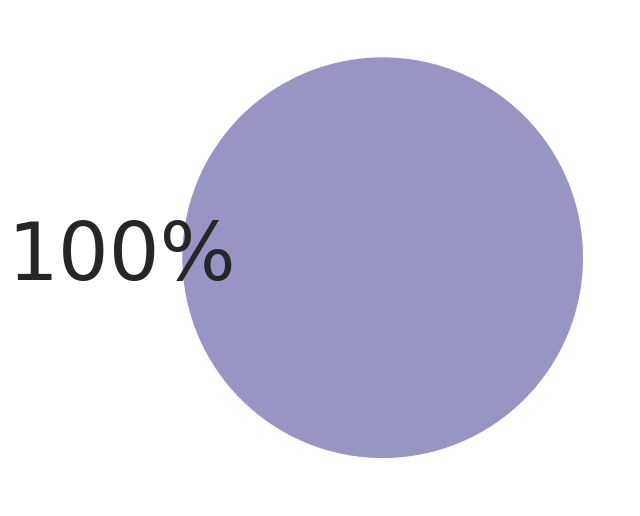

In [44]:
config_detailed_list = merged_tab.config_detailed.unique()
print('beta total:',len(merged_tab.genome[(merged_tab['class']=='Acidithiobacillia')].unique()))

for conf in config_detailed_list: 
    print(conf)
    display(len(merged_tab.genome[(merged_tab['class']=='Acidithiobacillia') & (merged_tab['config_detailed']==conf)].unique()) / len(merged_tab.genome[(merged_tab['class']=='Acidithiobacillia')].unique()))
    display(len(merged_tab.genome[(merged_tab['class']=='Acidithiobacillia') & (merged_tab['config_detailed']==conf)].unique()))

plt.figure(figsize=(9,11))
explode = (0.1)
plt.pie(np.array([1]), autopct='%1.0f%%', colors=(color_code[1], 'red'), pctdistance=1.3, labeldistance=1.4, textprops={'fontsize': 80})


pp = PdfPages('/home/choberts/article_one/img/acidithio_tuv_piechart.pdf')
plt.savefig(pp, format='pdf', 
            bbox_inches='tight', 
            pad_inches=1)
pp.close()


plt.show()




## FNR prediction

In [11]:
fnr_triplets = triplets_tab.merge(fimo_res_bestpval, on =['genome', 'n_triplet'])
display(fnr_triplets)

print('devant T')
for config in fnr_triplets['config_detailed'].unique():
    print(config, len(fnr_triplets.genome[(fnr_triplets['config_detailed']==config) & (fnr_triplets['gene']=='UbiT')].unique()))

print('')
print('devant U')
for config in fnr_triplets['config_detailed'].unique():
    print(config, len(fnr_triplets.genome[(fnr_triplets['config_detailed']==config) & (fnr_triplets['gene']=='UbiU')].unique()))

,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,...,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence
0,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,...,contig_1,1,UbiU,380,393,15.5775,2.860000e-06,0.014500,TTGAYCYRGRTCAA,TTGACGAGCATCAA
1,GCA_013347225.1_ASM1334722v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,15.0,-3.0,935.0,...,contig_1,1,UbiU,126,139,11.5902,3.340000e-05,0.024200,YTGMYTTAARKCAR,CTGCCGTCCGTCAG
2,GCA_013693935.1_ASM1369393v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,2497.0,-13.0,3389.0,...,contig_1,1,UbiT,333,346,19.6338,2.510000e-08,0.004660,TTGAYCYRGRTCAA,TTGATCTGGGTCAA
3,GCA_015767675.1_ASM1576767v1,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2423.0,13.0,3485.0,...,contig_1,1,UbiT,381,394,10.7049,4.100000e-05,0.033100,YTGMYTTAARKCAR,TTGATGCACAACAG
4,GCA_015767675.1_ASM1576767v1,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2423.0,13.0,3485.0,...,contig_1,1,UbiU,411,424,11.3443,3.740000e-05,0.026700,YTGMYTTAARKCAR,CTAATTTACATCAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,GCF_932126575.1_Thauera_sp_Piv1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,55.0,103.0,1069.0,...,contig_1,1,UbiU,373,386,16.0704,1.970000e-06,0.011400,TTGAYCYRGRTCAA,TTGACACGAGTCAA
2412,GCF_937425535.1_Rhodovastum_atsumiense_G2-11,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,+++,-3.0,-3.0,1037.0,...,contig_1,1,UbiT,333,346,17.4930,5.200000e-07,0.006200,TTGAYCYRGRTCAA,TTGATTCAGATCAA
2413,GCF_946902045.1_PRJEB55195,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,11.0,-13.0,915.0,...,contig_1,1,UbiU,345,358,18.9344,4.720000e-08,0.000695,YTGAYTTAARTCAR,TTGATTTAAGTCAG
2414,GCF_949787665.1_MIP2473_genome,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,-++,2407.0,11.0,3425.0,...,contig_1,1,UbiU,369,382,11.1967,4.720000e-05,0.030900,YTGAYTTAARTCAR,CTGCCTAATATCAA


devant T
2_sticked 10
4_UV_sticked 46
3_UV_sticked 111
3_sticked 653
1_UV_sticked 3
2_UV_sticked 3
1_sticked 161
4_sticked 14
2_unsticked 0
2_TU_sticked 0

devant U
2_sticked 286
4_UV_sticked 40
3_UV_sticked 135
3_sticked 660
1_UV_sticked 3
2_UV_sticked 10
1_sticked 25
4_sticked 12
2_unsticked 2
2_TU_sticked 5


In [46]:
fnr_triplets[fnr_triplets['n_triplet']==2]

,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,...,seq,index,gene,start_motif,end_motif,score,p-value,q-value,motif_id,matched_sequence
208,GCF_000632805.1_ASM63280v1,2,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,1959.0,14.0,2851.0,...,contig_1,2,UbiU,378,391,12.7705,0.000019,0.0169,YTGMYTTAARKCAR,CTGACGCATGTCAG
822,GCF_004798725.1_ASM479872v1,2,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,-3.0,43.0,981.0,...,contig_3,2,UbiU,366,379,14.4211,0.000009,0.0354,TTGABCYRGVTCAA,TTGCGCACGATCAA
823,GCF_004798725.1_ASM479872v1,2,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,-3.0,43.0,981.0,...,contig_3,2,UbiU,275,288,16.1690,0.000002,0.0114,TTGAYCYRGRTCAA,TTGCCGCAGGTCAA


In [57]:
fnr_triplets.to_csv('/home/choberts/article_one/sup mat/TableS4-fnr_triplets.csv')

## distance des sites FNR par rapport au codon start

In [47]:
fnr_triplets_distant = fnr_triplets[(fnr_triplets['config_detailed']=='4_UV_sticked') | (fnr_triplets['config_detailed']=='3_UV_sticked') | (fnr_triplets['config_detailed']=='2_UV_sticked') | (fnr_triplets['config_detailed']=='1_UV_sticked')]

la position médiane du site FNR est 87.5
la position moyenne du site FNR est 109.69908940397352


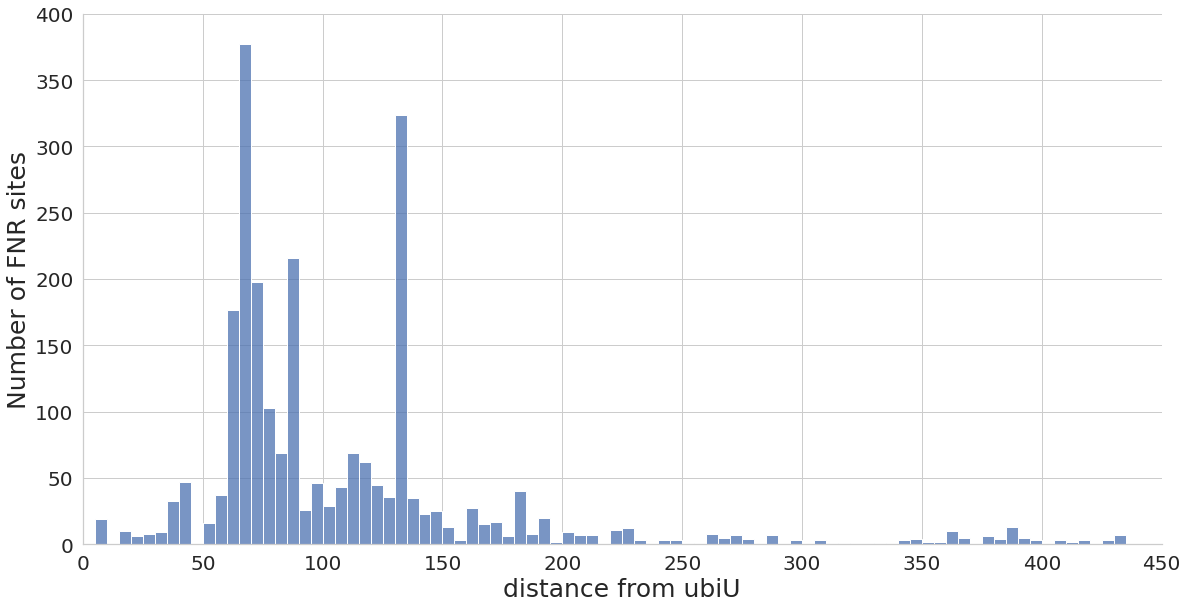

In [45]:
#général
fnr_triplets = add_distance_triplet(fnr_triplets, 1)
fnr_triplets = add_distance_triplet(fnr_triplets, 2)
hist_distance_simple(fnr_triplets, 400)

print('la position médiane du site FNR est', np.median(450-((fnr_triplets['start_motif']+fnr_triplets['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets['start_motif']+fnr_triplets['end_motif'])/2).values))

la position médiane du site FNR est 70.5
la position moyenne du site FNR est 105.2967032967033
la position médiane du site FNR est 69.5
la position moyenne du site FNR est 87.5229357798165


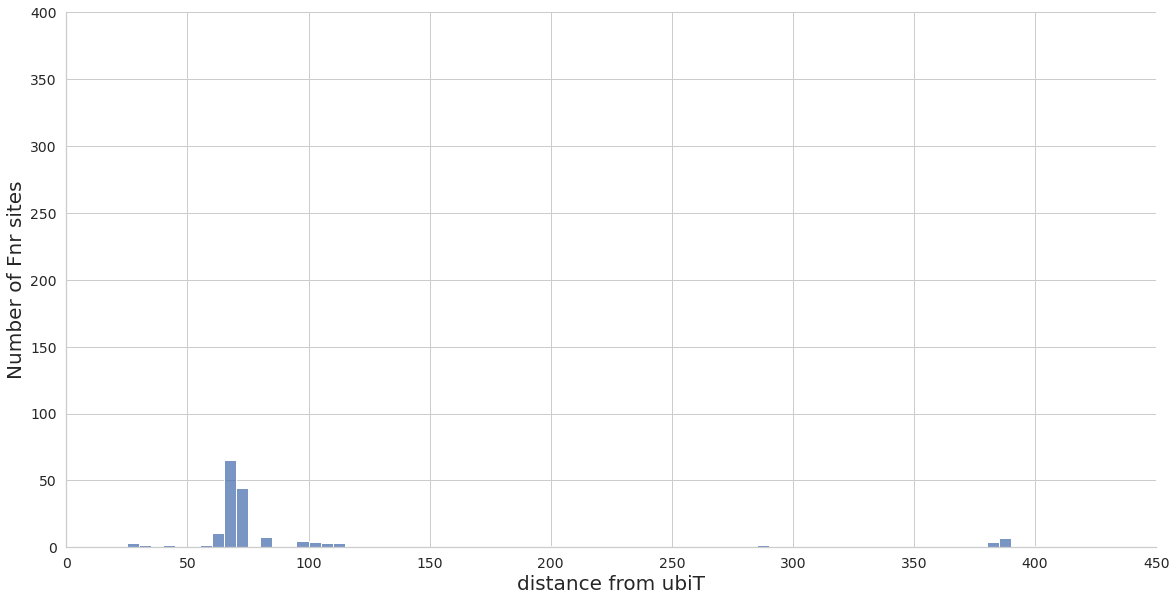

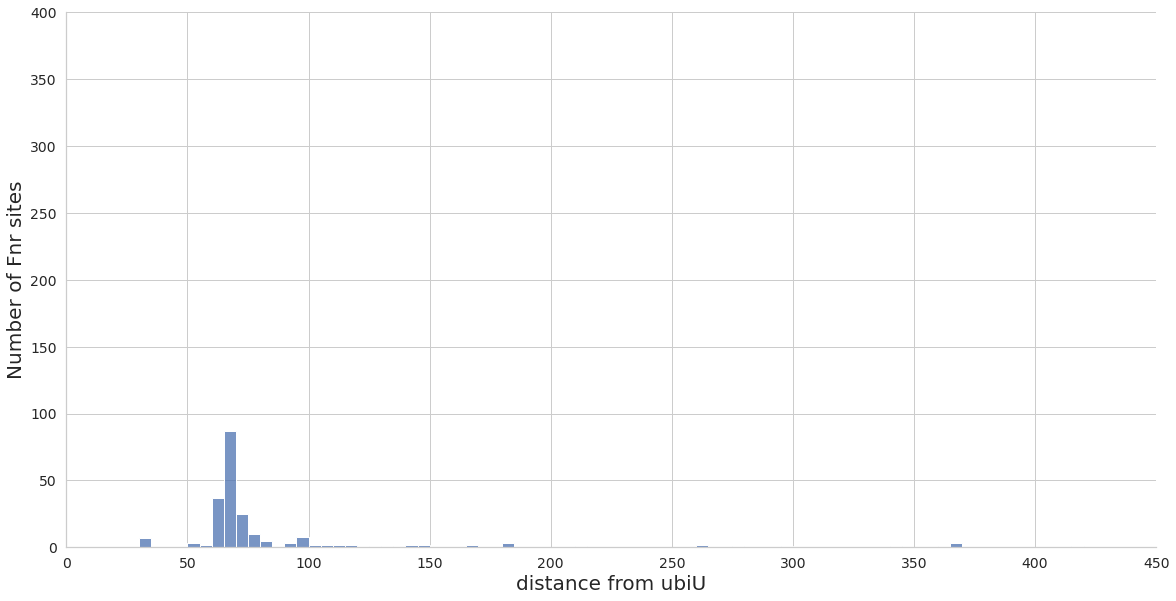

In [13]:
fnr_triplets_distant_T = fnr_triplets[(fnr_triplets['gene'] == 'UbiT') & ((fnr_triplets['config_detailed']=='4_UV_sticked') | (fnr_triplets['config_detailed']=='3_UV_sticked') | (fnr_triplets['config_detailed']=='2_UV_sticked') | (fnr_triplets['config_detailed']=='1_UV_sticked'))]
fnr_triplets_distant_U = fnr_triplets[(fnr_triplets['gene'] == 'UbiU') & ((fnr_triplets['config_detailed']=='4_UV_sticked') | (fnr_triplets['config_detailed']=='3_UV_sticked') | (fnr_triplets['config_detailed']=='2_UV_sticked') | (fnr_triplets['config_detailed']=='1_UV_sticked'))]


hist_distance_simple(fnr_triplets_distant_T, 400)
hist_distance_simple(fnr_triplets_distant_U, 400)

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_distant_T['start_motif']+fnr_triplets_distant_T['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_distant_T['start_motif']+fnr_triplets_distant_T['end_motif'])/2).values))

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_distant_U['start_motif']+fnr_triplets_distant_U['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_distant_U['start_motif']+fnr_triplets_distant_U['end_motif'])/2).values))

la position médiane du site FNR est 69.0
la position moyenne du site FNR est 76.69047619047619
la position médiane du site FNR est 290.0
la position moyenne du site FNR est 306.1923076923077


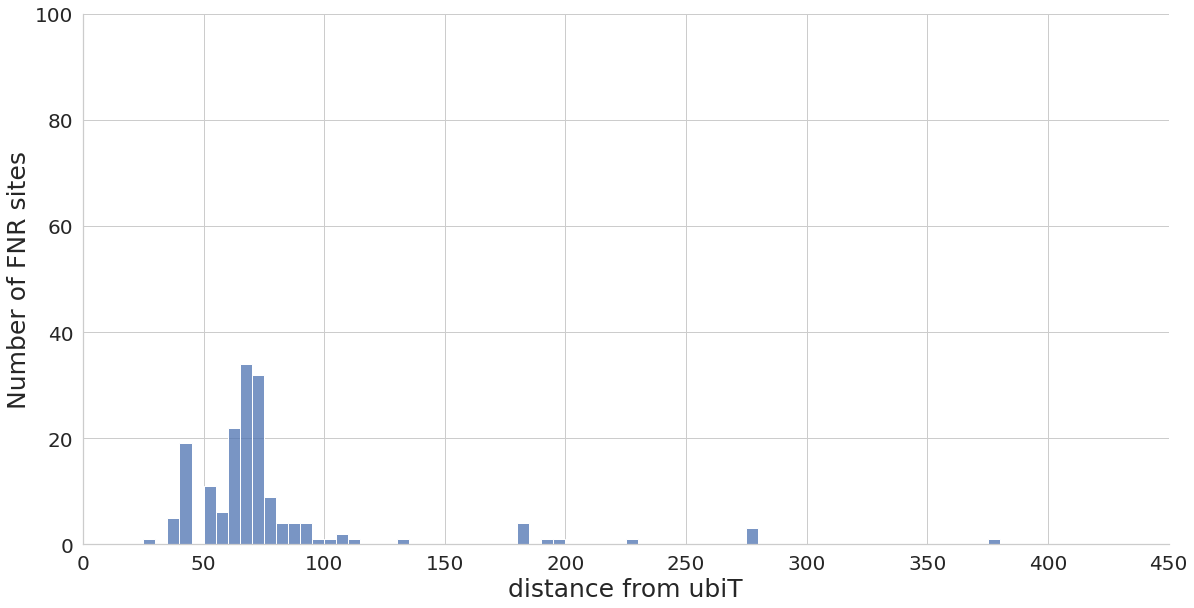

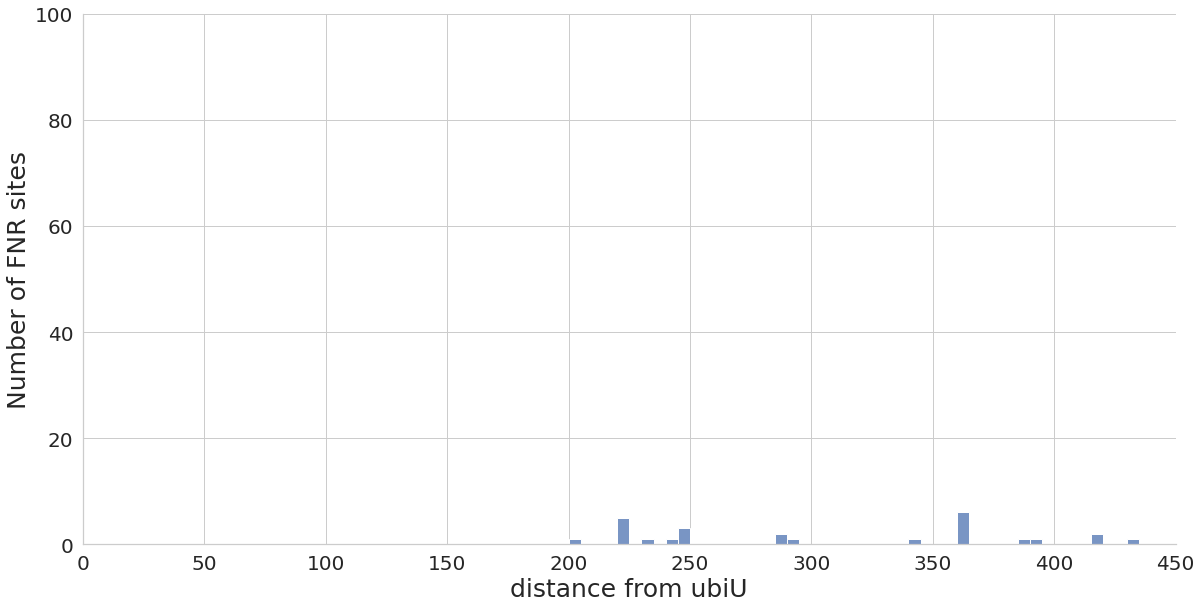

In [47]:
#config 1 : 1_sticked
#ubiT

fnr_triplets_1 = fnr_triplets[(fnr_triplets['config_detailed'] == '1_sticked') & (fnr_triplets['gene'] == 'UbiT')]

hist_distance_simple(fnr_triplets_1, 100)
plt.savefig("orga1_ubiT.pdf", format="pdf", bbox_inches="tight")


print('la position médiane du site FNR est', np.median(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))

#ubiU
fnr_triplets_1 = fnr_triplets[(fnr_triplets['config_detailed'] == '1_sticked') & (fnr_triplets['gene'] == 'UbiU')]

hist_distance_simple(fnr_triplets_1, 100)
plt.savefig("orga1_ubiU.pdf", format="pdf", bbox_inches="tight")


print('la position médiane du site FNR est', np.median(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))

In [51]:
#config 1 : 1_sticked
#ubiT
fnr_triplets_1 = fnr_triplets[(fnr_triplets['config_detailed'] == '1_UV_sticked') & (fnr_triplets['gene'] == 'UbiT')]


print(len(fnr_triplets_1.genome))
print('la position médiane du site FNR est', np.median(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))

#ubiU
fnr_triplets_1 = fnr_triplets[(fnr_triplets['config_detailed'] == '1_UV_sticked') & (fnr_triplets['gene'] == 'UbiU')]

print(len(fnr_triplets_1.genome))
print('la position médiane du site FNR est', np.median(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_1['start_motif']+fnr_triplets_1['end_motif'])/2).values))

3
la position médiane du site FNR est 28.5
la position moyenne du site FNR est 21.833333333333332
4
la position médiane du site FNR est 96.0
la position moyenne du site FNR est 107.5


la position médiane du site FNR est 130.5
la position moyenne du site FNR est 126.80508474576271
la position médiane du site FNR est 87.5
la position moyenne du site FNR est 107.1403743315508


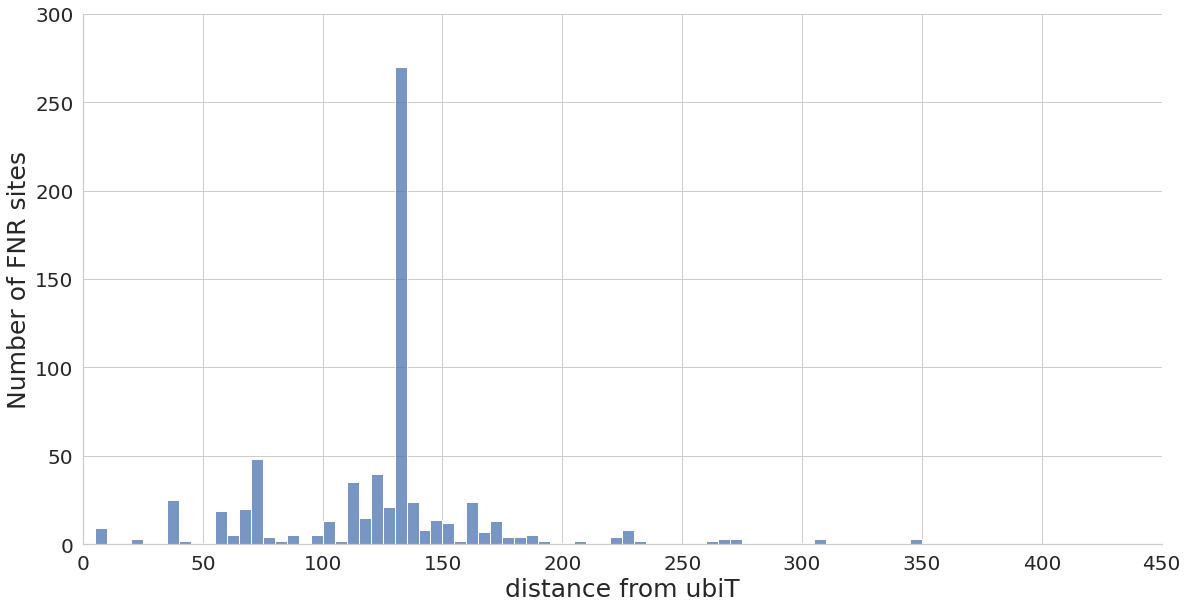

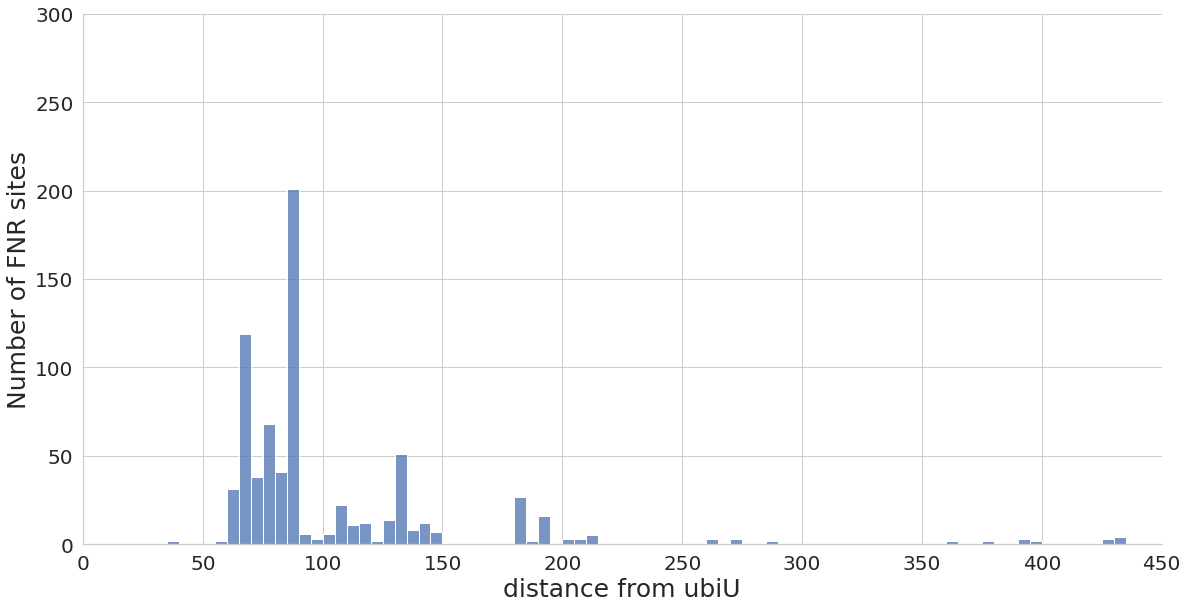

In [49]:
#config 2 : 3_sticked

#ubiT
fnr_triplets_2 = fnr_triplets[(fnr_triplets['config_detailed'] == '3_sticked') & (fnr_triplets['gene'] == 'UbiT')]


hist_distance_simple(fnr_triplets_2, 300)

plt.savefig("orga3_ubiT.pdf", format="pdf", bbox_inches="tight")



print('la position médiane du site FNR est', np.median(450-((fnr_triplets_2['start_motif']+fnr_triplets_2['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_2['start_motif']+fnr_triplets_2['end_motif'])/2).values))

#ubiU
fnr_triplets_2 = fnr_triplets[(fnr_triplets['config_detailed'] == '3_sticked') & (fnr_triplets['gene'] == 'UbiU')]


hist_distance_simple(fnr_triplets_2, 300)
plt.savefig("orga3_ubiU.pdf", format="pdf", bbox_inches="tight")


print('la position médiane du site FNR est', np.median(450-((fnr_triplets_2['start_motif']+fnr_triplets_2['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_2['start_motif']+fnr_triplets_2['end_motif'])/2).values))

la position médiane du site FNR est 69.5
la position moyenne du site FNR est 100.79032258064517
la position médiane du site FNR est 69.5
la position moyenne du site FNR est 79.39041095890411


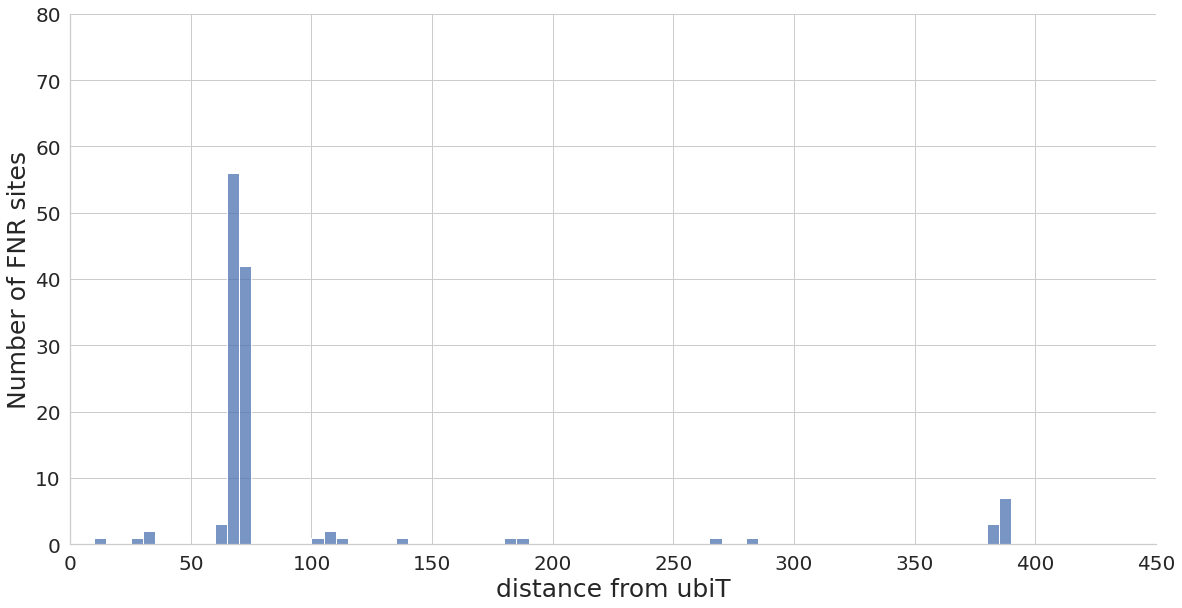

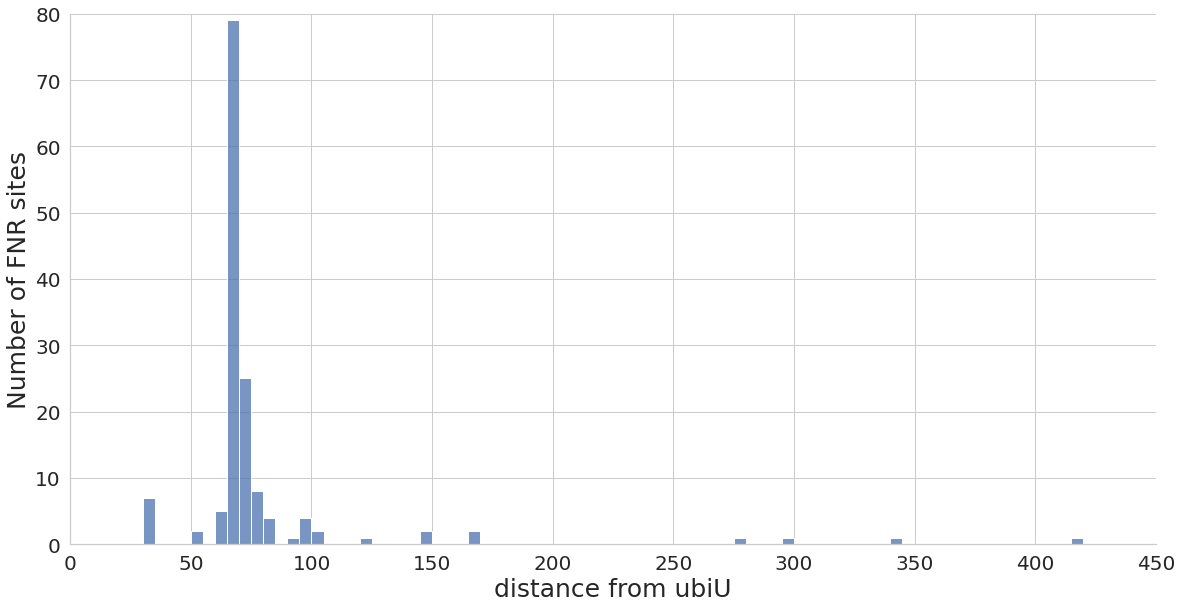

In [50]:
#config 3 : 3_UV_sticked

#ubiT
fnr_triplets_3 = fnr_triplets[(fnr_triplets['config_detailed'] == '3_UV_sticked') & (fnr_triplets['gene'] == 'UbiT')]

hist_distance_simple(fnr_triplets_3, 80)
plt.savefig("orga4_ubiT.pdf", format="pdf", bbox_inches="tight")


print('la position médiane du site FNR est', np.median(450-((fnr_triplets_3['start_motif']+fnr_triplets_3['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_3['start_motif']+fnr_triplets_3['end_motif'])/2).values))

#ubiU
fnr_triplets_3 = fnr_triplets[(fnr_triplets['config_detailed'] == '3_UV_sticked') & (fnr_triplets['gene'] == 'UbiU')]

hist_distance_simple(fnr_triplets_3, 80)
plt.savefig("orga4_ubiU.pdf", format="pdf", bbox_inches="tight")


print('la position médiane du site FNR est', np.median(450-((fnr_triplets_3['start_motif']+fnr_triplets_3['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_3['start_motif']+fnr_triplets_3['end_motif'])/2).values))

la position médiane du site FNR est 81.5
la position moyenne du site FNR est 111.59615384615384
la position médiane du site FNR est 64.5
la position moyenne du site FNR est 99.23584905660377


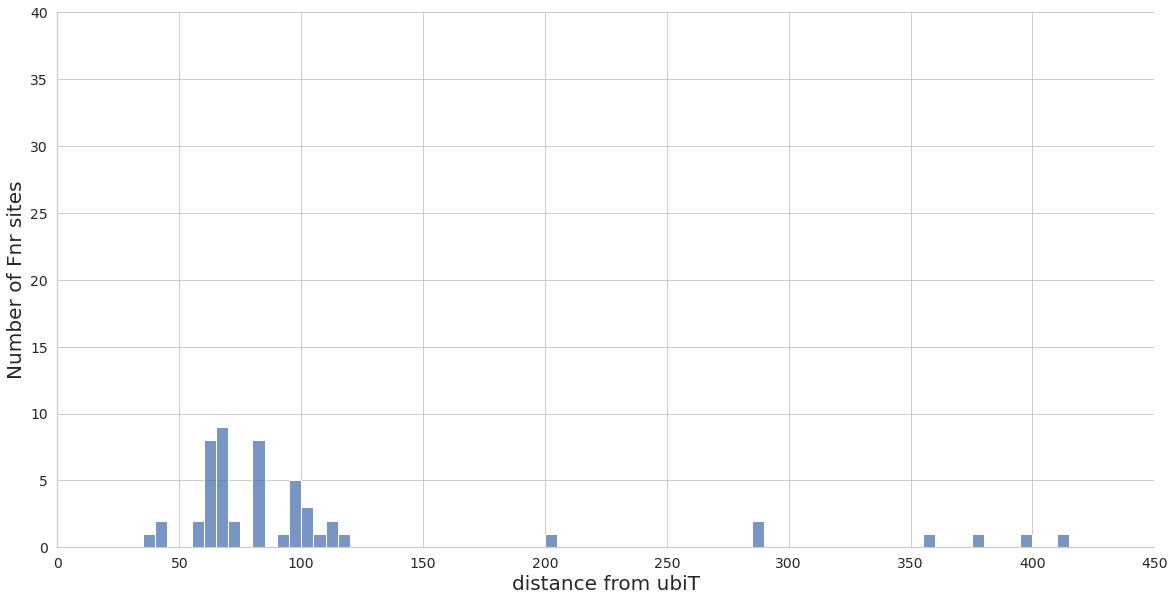

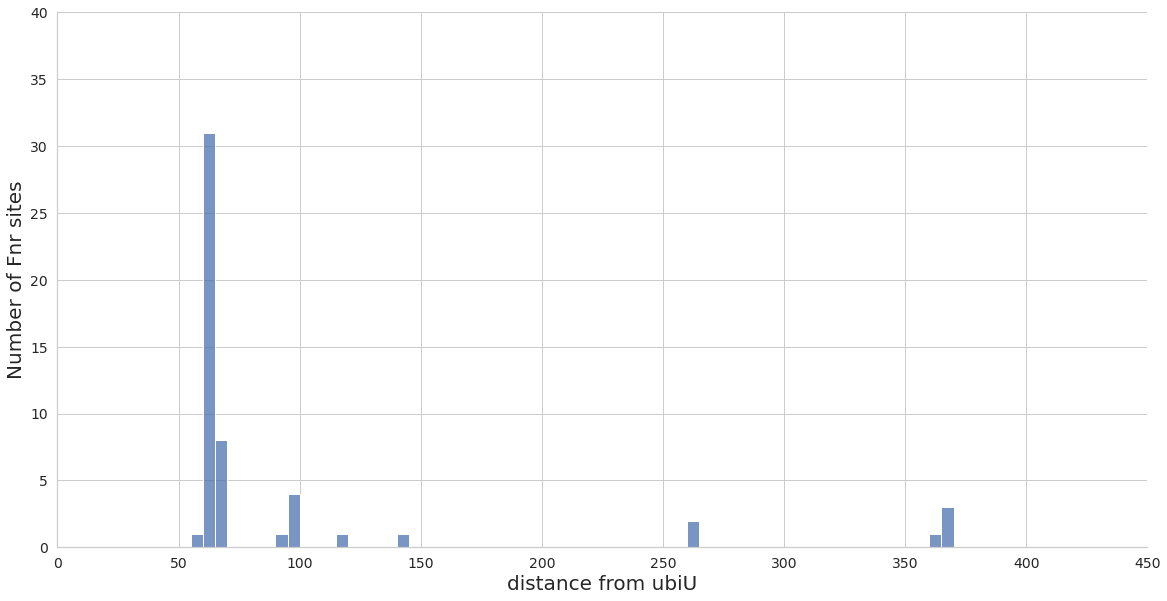

In [54]:
#config 4 : 4_UV_sticked

#ubiT
fnr_triplets_4 = fnr_triplets[(fnr_triplets['config_detailed'] == '4_UV_sticked') & (fnr_triplets['gene'] == 'UbiT')]

hist_distance_simple(fnr_triplets_4, 40)

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_4['start_motif']+fnr_triplets_4['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_4['start_motif']+fnr_triplets_4['end_motif'])/2).values))

#ubiU
fnr_triplets_4 = fnr_triplets[(fnr_triplets['config_detailed'] == '4_UV_sticked') & (fnr_triplets['gene'] == 'UbiU')]

hist_distance_simple(fnr_triplets_4, 40)

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_4['start_motif']+fnr_triplets_4['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_4['start_motif']+fnr_triplets_4['end_motif'])/2).values))

la position médiane du site FNR est 369.0
la position moyenne du site FNR est 319.0
la position médiane du site FNR est 72.5
la position moyenne du site FNR est 89.54088050314465


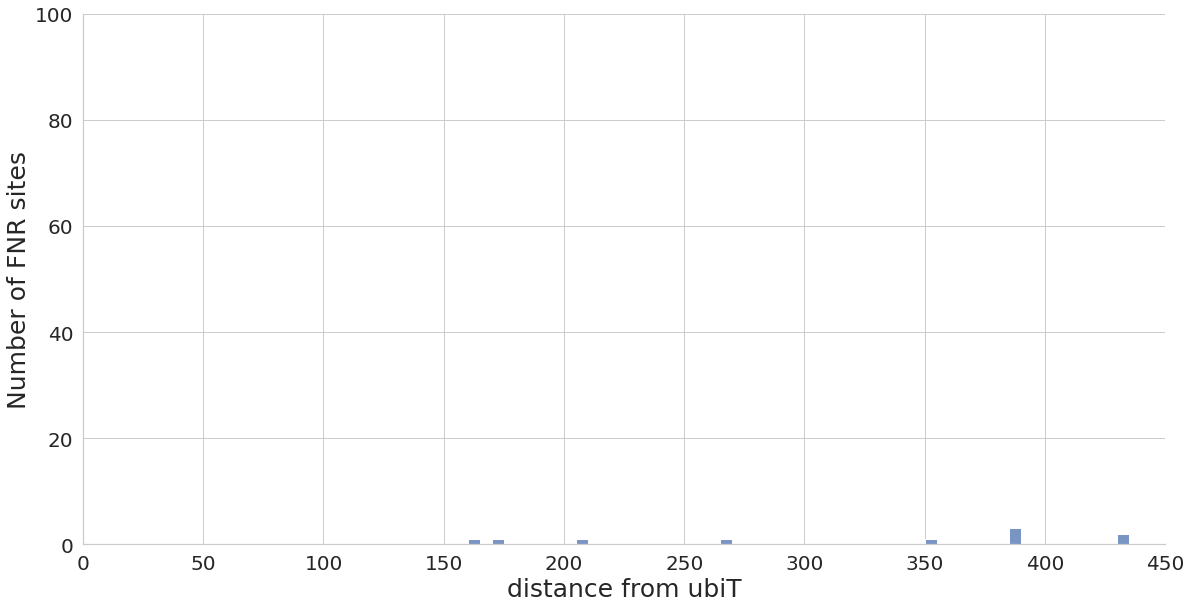

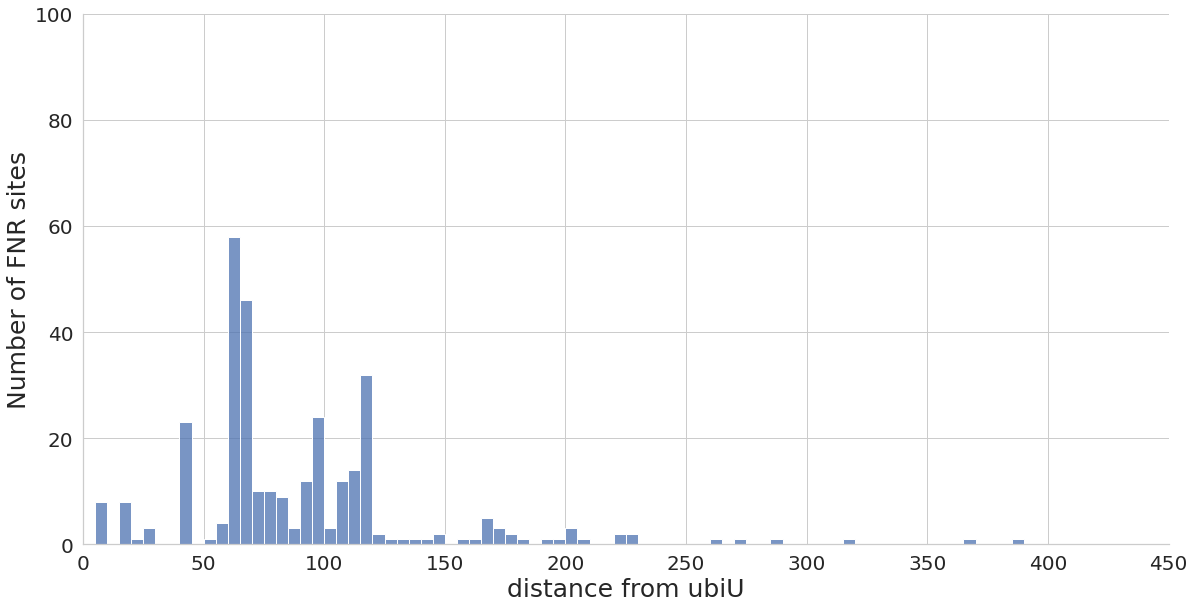

In [51]:
#config 5 : 4_UV_sticked

#ubiT
fnr_triplets_5 = fnr_triplets[(fnr_triplets['config_detailed'] == '2_sticked') & (fnr_triplets['gene'] == 'UbiT')]

hist_distance_simple(fnr_triplets_5, 100)
plt.savefig("orga2_ubiT.pdf", format="pdf", bbox_inches="tight")

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_5['start_motif']+fnr_triplets_5['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_5['start_motif']+fnr_triplets_5['end_motif'])/2).values))

#ubiU
fnr_triplets_5 = fnr_triplets[(fnr_triplets['config_detailed'] == '2_sticked') & (fnr_triplets['gene'] == 'UbiU')]

hist_distance_simple(fnr_triplets_5, 100)
plt.savefig("orga2_ubiU.pdf", format="pdf", bbox_inches="tight")

print('la position médiane du site FNR est', np.median(450-((fnr_triplets_5['start_motif']+fnr_triplets_5['end_motif'])/2).values))
print('la position moyenne du site FNR est', np.mean(450-((fnr_triplets_5['start_motif']+fnr_triplets_5['end_motif'])/2).values))

# # # # # # fin

In [31]:
# ajout des informations sur la topologie dans le tableau de données regroupant les informations sur les motifs fnr prédits

fnr_prediction = tuv_filtered_df_sorted.merge(fimo_res[['genome','n_triplet','start_motif','end_motif',
                                                        'score','p-value','q-value','motif_id',
                                                        'matched_sequence']], on = ['genome', 'n_triplet'])

#display(fnr_prediction[['class', 'family', 'order', 'species', 'seq', 'start_motif',
#                        'index', 'gene']][fnr_prediction['motif_gen']=='DP'].head(20))
#display(fnr_prediction[['class', 'family', 'order', 'species', 'seq'
#                          , 'start_motif', 'index', 'gene']][fnr_prediction['motif_gen']=='global'].head(20))

triplets_tab['strand_concat']=triplets_tab['strand']
fnr_prediction_orga = fnr_prediction.merge(triplets_tab[['genome', 'triplet', 'strand_concat']], on = 'genome', how = 'outer')

fnr_prediction_orga

ind = fnr_prediction_orga.groupby(['genome', 'n_triplet','gene_name', 'start_motif'])['p-value'].idxmin()
fnr_prediction_orga_bestpval = fnr_prediction_orga.loc[ind].sort_index()

In [32]:
fnr_prediction_orga

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score_x,...,distance_UV,start_motif,end_motif,score_y,p-value,q-value,motif_id,matched_sequence,triplet,strand_concat
0,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,126.0,139.0,11.6393,0.000039,0.0260,YTGAYTTAARTCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++
1,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,380.0,393.0,10.5082,0.000064,0.0392,YTGAYTTAARTCAR,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
2,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,380.0,393.0,13.4079,0.000017,0.0451,TTGABCYRGVTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
3,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,380.0,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
4,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,126.0,139.0,11.5902,0.000033,0.0242,YTGMYTTAARKCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,GCF_030036535.1_ASM3003653v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UbiT UbiU UbiV,+++
26348,GCF_030296015.1_ASM3029601v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UbiT UbiU UbiV,-++
26349,GCF_030406045.1_ASM3040604v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UbiV UbiU UbiT,--+
26350,GCF_900475945.1_48290_E02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UbiT UbiV UbiU,---


In [33]:
fnr_prediction_orga_bestpval

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score_x,...,distance_UV,start_motif,end_motif,score_y,p-value,q-value,motif_id,matched_sequence,triplet,strand_concat
3,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,380.0,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
4,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,15.0,126.0,139.0,11.5902,0.000033,0.0242,YTGMYTTAARKCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++
8,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120.0,1081043.0,+,UbiV,1.400000e-125,411.0,...,15.0,380.0,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
9,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120.0,1081043.0,+,UbiV,1.400000e-125,411.0,...,15.0,126.0,139.0,11.5902,0.000033,0.0242,YTGMYTTAARKCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++
13,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04965,GCA_013347225.1_ASM1334722v1_974,1081040.0,1081492.0,+,UbiT,7.200000e-41,132.1,...,15.0,380.0,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26135,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12575,GCF_949787665.1_MIP2473_genome_2350,2665679.0,2666200.0,-,UbiT,2.600000e-59,191.8,...,11.0,370.0,383.0,12.7049,0.000020,0.0187,YTGMYTTAARKCAR,TTGACTCAAGGCAT,UbiT UbiU UbiV,-++
26139,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607.0,2669614.0,+,UbiU,2.800000e-173,568.0,...,11.0,369.0,382.0,11.1967,0.000047,0.0309,YTGAYTTAARTCAR,CTGCCTAATATCAA,UbiT UbiU UbiV,-++
26141,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607.0,2669614.0,+,UbiU,2.800000e-173,568.0,...,11.0,370.0,383.0,12.7049,0.000020,0.0187,YTGMYTTAARKCAR,TTGACTCAAGGCAT,UbiT UbiU UbiV,-++
26145,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12590,GCF_949787665.1_MIP2473_genome_2353,2669625.0,2670500.0,+,UbiV,3.400000e-125,409.7,...,11.0,369.0,382.0,11.1967,0.000047,0.0309,YTGAYTTAARTCAR,CTGCCTAATATCAA,UbiT UbiU UbiV,-++


## Ajout de l’information sur la position absolue du motif sur le chromosome¶

In [34]:
fnr_prediction_orga_bestpval.loc[fnr_prediction_orga_bestpval['strand'] == '+', 'abs_start_motif'] = fnr_prediction_orga_bestpval['beginning'] - (450 - fnr_prediction_orga_bestpval['start_motif'])
fnr_prediction_orga_bestpval.loc[fnr_prediction_orga_bestpval['strand'] == '+', 'abs_end_motif'] = fnr_prediction_orga_bestpval['beginning'] - (451 - fnr_prediction_orga_bestpval['end_motif'] )
fnr_prediction_orga_bestpval.loc[fnr_prediction_orga_bestpval['strand'] == '-', 'abs_end_motif'] = fnr_prediction_orga_bestpval['end'] + (450 - fnr_prediction_orga_bestpval['start_motif'] +1) #échange du début et de la fin pour faciliter la suite
fnr_prediction_orga_bestpval.loc[fnr_prediction_orga_bestpval['strand'] == '-', 'abs_start_motif'] = fnr_prediction_orga_bestpval['end'] + (451 - fnr_prediction_orga_bestpval['end_motif'] +1)


In [35]:
fnr_prediction_orga_bestpval

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score_x,...,end_motif,score_y,p-value,q-value,motif_id,matched_sequence,triplet,strand_concat,abs_start_motif,abs_end_motif
3,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++,1079022.0,1079034.0
4,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04955,GCA_013347225.1_ASM1334722v1_972,1079092.0,1080105.0,+,UbiU,5.000000e-170,557.3,...,139.0,11.5902,0.000033,0.0242,YTGMYTTAARKCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++,1078768.0,1078780.0
8,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120.0,1081043.0,+,UbiV,1.400000e-125,411.0,...,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++,1080050.0,1080062.0
9,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120.0,1081043.0,+,UbiV,1.400000e-125,411.0,...,139.0,11.5902,0.000033,0.0242,YTGMYTTAARKCAR,CTGCCGTCCGTCAG,UbiU UbiV UbiT,+++,1079796.0,1079808.0
13,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04965,GCA_013347225.1_ASM1334722v1_974,1081040.0,1081492.0,+,UbiT,7.200000e-41,132.1,...,393.0,15.5775,0.000003,0.0145,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++,1080970.0,1080982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26135,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12575,GCF_949787665.1_MIP2473_genome_2350,2665679.0,2666200.0,-,UbiT,2.600000e-59,191.8,...,383.0,12.7049,0.000020,0.0187,YTGMYTTAARKCAR,TTGACTCAAGGCAT,UbiT UbiU UbiV,-++,2666269.0,2666281.0
26139,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607.0,2669614.0,+,UbiU,2.800000e-173,568.0,...,382.0,11.1967,0.000047,0.0309,YTGAYTTAARTCAR,CTGCCTAATATCAA,UbiT UbiU UbiV,-++,2668526.0,2668538.0
26141,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12585,GCF_949787665.1_MIP2473_genome_2352,2668607.0,2669614.0,+,UbiU,2.800000e-173,568.0,...,383.0,12.7049,0.000020,0.0187,YTGMYTTAARKCAR,TTGACTCAAGGCAT,UbiT UbiU UbiV,-++,2668527.0,2668539.0
26145,GCF_949787665.1_MIP2473_genome,contig_1,PHMPLC_12590,GCF_949787665.1_MIP2473_genome_2353,2669625.0,2670500.0,+,UbiV,3.400000e-125,409.7,...,382.0,11.1967,0.000047,0.0309,YTGAYTTAARTCAR,CTGCCTAATATCAA,UbiT UbiU UbiV,-++,2669544.0,2669556.0


In [46]:
print(len(fnr_prediction_orga_bestpval['genome'].unique()), 'genomes ont au moins un site FNR')


1111 genomes ont au moins un site FNR


In [53]:
fnr_prediction_orga_bestpval[fnr_prediction_orga_bestpval['gene_name']=='UbiV']

,genome,seq,prot_id,query,beginning,end,strand,target,i-evalue,score_x,...,end_motif,score_y,p-value,q-value,motif_id,matched_sequence,triplet,strand_concat,abs_start_motif,abs_end_motif
1,GCA_013347225.1_ASM1334722v1,contig_1,HEANGH_04960,GCA_013347225.1_ASM1334722v1_973,1080120.0,1081043.0,+,UbiV,1.400000e-125,411.0,...,393.0,15.5775,2.860000e-06,0.014500,TTGAYCYRGRTCAA,TTGACGAGCATCAA,UbiU UbiV UbiT,+++,1080050.0,1080062.0
9,GCA_013693935.1_ASM1369393v1,contig_1,LHPOOH_14335,GCA_013693935.1_ASM1369393v1_2814,3069929.0,3070834.0,-,UbiV,8.600000e-111,362.4,...,346.0,19.6338,2.510000e-08,0.004660,TTGAYCYRGRTCAA,TTGATCTGGGTCAA,UbiT UbiV UbiU,+--,3070940.0,3070952.0
33,GCA_016495705.1_ASM1649570v1,contig_1,MDLPAB_22065,GCA_016495705.1_ASM1649570v1_4268,4473679.0,4474557.0,+,UbiV,2.000000e-119,390.8,...,295.0,18.9180,1.980000e-07,0.000629,YTGMYTTAARKCAR,TTGATTTAAGGCAG,UbiT UbiU UbiV,-++,4473511.0,4473523.0
34,GCA_016495705.1_ASM1649570v1,contig_1,MDLPAB_22065,GCA_016495705.1_ASM1649570v1_4268,4473679.0,4474557.0,+,UbiV,2.000000e-119,390.8,...,265.0,18.8689,1.850000e-07,0.000565,YTGMYTTAARKCAR,CTGCCTTAAATCAA,UbiT UbiU UbiV,-++,4473481.0,4473493.0
57,GCA_016618195.1_ASM1661819v1,contig_1,FOFEAL_18300,GCA_016618195.1_ASM1661819v1_3555,3963101.0,3963976.0,+,UbiV,9.800000e-117,382.0,...,46.0,18.9180,1.980000e-07,0.000629,YTGMYTTAARKCAR,TTGATTTAAGGCAG,UbiT UbiU UbiV,-++,3962684.0,3962696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,GCF_907164845.1_Lysobacter_CECT30171,contig_1,APFMGB_02365,GCF_907164845.1_Lysobacter_CECT30171_468,505427.0,506317.0,-,UbiV,4.100000e-107,350.4,...,45.0,15.9155,2.210000e-06,0.017500,TTGAYCYRGRTCAA,CTGATCCGGATCAA,UbiT UbiV UbiU,+--,506724.0,506736.0
18455,GCF_907164845.1_Lysobacter_CECT30171,contig_1,APFMGB_02365,GCF_907164845.1_Lysobacter_CECT30171_468,505427.0,506317.0,-,UbiV,4.100000e-107,350.4,...,397.0,16.3239,1.630000e-06,0.011400,TTGAYCYRGRTCAA,CTGATCCAGGTCAA,UbiT UbiV UbiU,+--,506372.0,506384.0
18466,GCF_932126575.1_Thauera_sp_Piv1,contig_1,MINHCA_04365,GCF_932126575.1_Thauera_sp_Piv1_853,938041.0,938952.0,+,UbiV,3.400000e-114,373.6,...,386.0,16.0704,1.970000e-06,0.011400,TTGAYCYRGRTCAA,TTGACACGAGTCAA,UbiU UbiV UbiT,+++,937964.0,937976.0
18483,GCF_937425535.1_Rhodovastum_atsumiense_G2-11,contig_1,MCHOON_03775,GCF_937425535.1_Rhodovastum_atsumiense_G2-11_744,868983.0,869900.0,+,UbiV,3.500000e-101,330.9,...,346.0,17.4930,5.200000e-07,0.006200,TTGAYCYRGRTCAA,TTGATTCAGATCAA,UbiT UbiU UbiV,+++,868866.0,868878.0


In [ ]:
fnr_prediction_orga_bestpval

In [51]:
df_droplog = pd.DataFrame()
mask = fnr_prediction_orga_bestpval.duplicated(subset=['genome','seq'], keep='first')
df_fnr_atleastone = fnr_prediction_orga_bestpval.loc[~mask]

df_droplog = df_droplog.append(fnr_prediction_orga_bestpval.loc[mask]) #droplog pour stocker ce qui a été droped

print(len(df_fnr_atleastone['genome'][df_fnr_atleastone['gene_name']=='UbiU']), 'devant ubiU')
print(len(df_fnr_atleastone['genome'][df_fnr_atleastone['gene_name']=='UbiV']), 'devant ubiV')
print(len(df_fnr_atleastone['genome'][df_fnr_atleastone['gene_name']=='UbiT']), 'devant ubiT')

109 devant ubiU
490 devant ubiV
513 devant ubiT


/tmp/ipykernel_36820/1430903086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_droplog = df_droplog.append(fnr_prediction_orga_bestpval.loc[mask]) #droplog pour stocker ce qui a été droped


In [96]:
###
def hist_distance_simple_genes(df, gene1, gene2):
    df.loc[(df['gene1']==gene1) & (df['gene2']==gene2), "distance_to_plot"] = df['distance_gene1_gene2']
    df.loc[(df['gene3']==gene1) & (df['gene2']==gene2), "distance_to_plot"] = df['distance_gene2_gene3'] 
    #toplot = 450-((df['start_motif']+df['end_motif'])/2
    newBins = np.arange(0, 450, 5)
    #sns.displot(df['distance_to_plot'], bins=newBins, height=8, aspect=2)
    #plt.xlim(0,700)
    #if ylimit != 0 :
    #    plt.ylim(0,ylimit)
    #plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
    #xlabel =  df['gene'].values[0]
    #if df['gene'].values[0] == 'UbiT':
    #    xlabel = "ubiT"
    #if df['gene'].values[0] == 'UbiU':
    #    xlabel = "ubiU"
    #plt.xlabel('distance from ' + xlabel, fontsize = 20)
    #plt.ylabel('Number of Fnr sites', fontsize = 20)
    print(np.log(df['distance_to_plot']))
    #sns.histplot(np.log(df['distance_to_plot']))
    sns.histplot(df['distance_to_plot'])
    plt.xlim(0,10000)

triplets_tab_1=triplets_tab[triplets_tab['config_detailed']=='1_UV_sticked']
triplets_tab_2=triplets_tab[triplets_tab['config_detailed']=='2_UV_sticked']
triplets_tab_3=triplets_tab[triplets_tab['config_detailed']=='3_UV_sticked']
triplets_tab_4=triplets_tab[triplets_tab['config_detailed']=='4_UV_sticked']

#hist_distance_simple_genes(triplets_tab_1, 'UbiT', 'UbiU')

display(triplets_tab_1)


,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,replicon1,replicon2,replicon3,config,config_detailed,count,distance_to_plot
9,GCA_016745215.1_scaff03,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,+++,1899022.0,14.0,1900031.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,1899022.0
110,GCF_000227745.2_ASM22774v3,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,+++,619198.0,18.0,620211.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,619198.0
133,GCF_000327045.1_ASM32704v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,15.0,1837601.0,1838575.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,1837601.0
153,GCF_000599985.1_ASM59998v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,154.0,1416253.0,1417402.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,1416253.0
176,GCF_000807275.1_ASM80727v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,55.0,918256.0,919306.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,918256.0
760,GCF_011290485.1_ASM1129048v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,97.0,978639.0,979731.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,978639.0
818,GCF_013459415.1_ASM1345941v1,1,UbiT,UbiU,UbiV,UbiT UbiU UbiV,+++,9143.0,4.0,10124.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,9143.0
819,GCF_013459645.1_ASM1345964v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,4.0,9143.0,10124.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,9143.0
897,GCF_014725735.1_ASM1472573v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,-3.0,18078.0,19079.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,18078.0
1100,GCF_019469185.1_ASM1946918v1,1,UbiV,UbiU,UbiT,UbiV UbiU UbiT,---,158.0,1103242.0,1104395.0,contig_1,contig_1,contig_1,1,1_UV_sticked,1,1103242.0


In [102]:
display(len(triplets_tab_1))
display(len(triplets_tab_2))
display(len(triplets_tab_3))
display(len(triplets_tab_4))

11

17

147

78

10       6.577861
39      15.019243
71      12.864923
74       6.461468
99       6.495266
127     10.888072
130      6.499787
184      6.459904
275      6.517671
561      6.440947
572      6.510258
613      6.475433
624      6.495266
691     10.368384
1160     6.484635
1212     6.456770
1387     6.486161
Name: distance_to_plot, dtype: float64


,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,replicon1,replicon2,replicon3,config,config_detailed,count,distance_to_plot
10,GCA_017347485.1_ASM1734748v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,74.0,719.0,1686.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,719.0
39,GCF_000014865.1_ASM1486v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,0.0,3332532.0,3333461.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,3332532.0
71,GCF_000025485.1_ASM2548v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,29.0,386514.0,387478.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,386514.0
74,GCF_000026125.1_ASM2612v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,640.0,49.0,1600.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,640.0
99,GCF_000209655.1_ASM20965v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,84.0,662.0,1633.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,662.0
127,GCF_000297055.2_ASM29705v2,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,53534.0,55.0,54509.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,53534.0
130,GCF_000302535.1_ASM30253v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,665.0,39.0,1666.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,665.0
184,GCF_000828915.1_ASM82891v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,639.0,-3.0,1592.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,639.0
275,GCF_001714725.1_ASM171472v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,---,677.0,298.0,1910.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,677.0
561,GCF_004353865.1_ASM435386v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,+++,3.0,627.0,1553.0,contig_1,contig_1,contig_1,2,2_UV_sticked,1,627.0


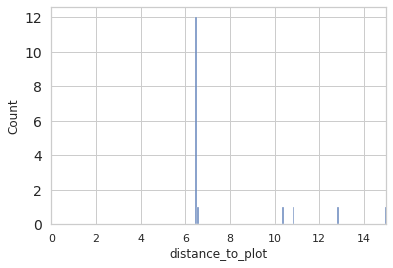

In [80]:
hist_distance_simple_genes(triplets_tab_2, 'UbiT', 'UbiV')
display(triplets_tab_2)


4       7.792762
13      7.779885
28      7.797702
69      7.838343
80      7.809947
          ...   
1550    6.274762
1555    7.791110
1556    7.805882
1557    7.851661
1565    7.786136
Name: distance_to_plot, Length: 147, dtype: float64


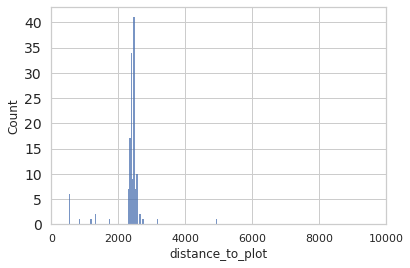

In [98]:
hist_distance_simple_genes(triplets_tab_3, 'UbiT', 'UbiU')


3        7.822845
8        7.196687
12       6.880384
106      8.943898
125     14.669905
          ...    
1466     8.351847
1474     8.831712
1514     9.915268
1517     7.910957
1560     8.606851
Name: distance_to_plot, Length: 78, dtype: float64


,genome,n_triplet,gene1,gene2,gene3,triplet,strand,distance_gene1_gene2,distance_gene2_gene3,distance_gene1_gene3,replicon1,replicon2,replicon3,config,config_detailed,count,distance_to_plot
3,GCA_013693935.1_ASM1369393v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,2497.0,-13.0,3389.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,2497.0
8,GCA_016699715.1_ASM1669971v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,1335.0,14.0,2269.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,1335.0
12,GCA_019623805.1_ASM1962380v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,++-,6.0,973.0,1869.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,973.0
106,GCF_000224005.2_ASM22400v3,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,7661.0,149.0,8748.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,7661.0
125,GCF_000284415.1_ASM28441v2,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,++-,23.0,2349952.0,2350871.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,2349952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,GCF_029625235.1_ASM2962523v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,++-,22.0,4238.0,5192.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,4238.0
1474,GCF_029854215.1_ASM2985421v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,6848.0,10.0,7805.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,6848.0
1514,GCF_030297115.1_ASM3029711v1,1,UbiT,UbiV,UbiU,UbiT UbiV UbiU,+--,20237.0,14.0,21156.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,20237.0
1517,GCF_030345315.1_ASM3034531v1,1,UbiU,UbiV,UbiT,UbiU UbiV UbiT,++-,11.0,2727.0,3610.0,contig_1,contig_1,contig_1,4,4_UV_sticked,1,2727.0


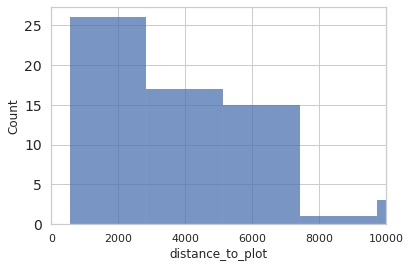

In [99]:
hist_distance_simple_genes(triplets_tab_4, 'UbiT', 'UbiV')
display(triplets_tab_4)
